<h1>PROYECTO FINAL</h1>

![badge](https://i.ibb.co/RbM4Lg6/author-badge.png)

<div>
    <img src="https://i.ibb.co/bLQcNC8/vaccine.jpg"/>
</div>

<h2>Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines</h2>

https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

¿Puedes predecir si las personas se pusieron las vacunas contra la H1N1 y la gripe estacional usando la información que compartieron sobre sus antecedentes, opiniones y comportamientos de salud?

En este desafío, veremos la vacunación, una medida clave de salud pública para combatir enfermedades infecciosas. Las vacunas proporcionan inmunización a los individuos, y suficiente inmunización en una comunidad puede reducir aún más la propagación de enfermedades a través de la "inmunidad de grupo."

Al momento del lanzamiento de esta competencia, las vacunas para el virus del COVID-19 todavía están en desarrollo y no están disponibles. En cambio, la competencia revisará la respuesta de salud pública a una pandemia respiratoria importante y reciente. A partir de la primavera de 2009, una pandemia causada por el virus de la influenza H1N1, conocido coloquialmente como "gripe porcina," se extendió por todo el mundo. Los investigadores estiman que en el primer año fue responsable de entre 151,000 y 575,000 muertes a nivel global.

# Importación de las librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import joblib
import pickle
import datetime

import os

from joblib import dump, load

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from keras.regularizers import l2

import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

import sweetviz as sv

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from lazypredict import LazyClassifier

import warnings

import math

from datetime import datetime



In [2]:
start_time = datetime.now()

In [3]:
warnings.filterwarnings("ignore")

# Creamos el PDF

In [4]:
# pdf_path = "results.pdf"
# c = canvas.Canvas(pdf_path, pagesize=letter)
# width, height = letter

# Interfaz

In [5]:
def update_values():
    global use_moda_train, delete_null_values_train, use_knn_imputer_train
    global use_moda_test, use_knn_imputer_test
    global num_neighbors_knn, number_of_best_features
    global use_logistic_regression_h1n1_vaccine, use_random_forest_h1n1_vaccine, use_ada_boost_classifier_h1n1_vaccine, use_xgb_classifier_h1n1_vaccine, use_red_neuronal_h1n1_vaccine
    global use_logistic_regression_seasonal_vaccine, use_random_forest_seasonal_vaccine, use_ada_boost_classifier_seasonal_vaccine, use_xgb_classifier_seasonal_vaccine, use_red_neuronal_seasonal_vaccine
    global epochs_red_neuronal, use_grid_search, use_random_search
    global use_standard_scaler, use_minmax_scaler, not_use_scaler
    global use_smote, use_adasyn, use_nearmiss, not_use_balanced

    use_moda_train = bool_var_use_moda_train.get()
    delete_null_values_train = bool_var_delete_null_values_train.get()
    use_knn_imputer_train = bool_var_use_knn_imputer_train.get()
    use_moda_test = bool_var_use_moda_test.get()
    use_knn_imputer_test = bool_var_use_knn_imputer_test.get()
    
    try:
        num_neighbors_knn = int(entry_num_neighbors_knn.get())
        if num_neighbors_knn < 1 or num_neighbors_knn > 20:
            raise ValueError
    except ValueError:
        messagebox.showerror("Error", "El número de vecinos debe estar entre 1 y 20")
        return

    try:
        number_of_best_features = int(entry_number_of_best_features.get())
        if number_of_best_features < 1 or number_of_best_features > 20:
            raise ValueError
    except ValueError:
        messagebox.showerror("Error", "El número de mejores características debe estar entre 1 y 20")
        return

    use_logistic_regression_h1n1_vaccine = bool_var_use_logistic_regression_h1n1_vaccine.get()
    use_random_forest_h1n1_vaccine = bool_var_use_random_forest_h1n1_vaccine.get()
    use_ada_boost_classifier_h1n1_vaccine = bool_var_use_ada_boost_classifier_h1n1_vaccine.get()
    use_xgb_classifier_h1n1_vaccine = bool_var_use_xgb_classifier_h1n1_vaccine.get()
    use_red_neuronal_h1n1_vaccine = bool_var_use_red_neuronal_h1n1_vaccine.get()

    use_logistic_regression_seasonal_vaccine = bool_var_use_logistic_regression_seasonal_vaccine.get()
    use_random_forest_seasonal_vaccine = bool_var_use_random_forest_seasonal_vaccine.get()
    use_ada_boost_classifier_seasonal_vaccine = bool_var_use_ada_boost_classifier_seasonal_vaccine.get()
    use_xgb_classifier_seasonal_vaccine = bool_var_use_xgb_classifier_seasonal_vaccine.get()
    use_red_neuronal_seasonal_vaccine = bool_var_use_red_neuronal_seasonal_vaccine.get()
    
    try:
        epochs_red_neuronal = int(entry_epochs_red_neuronal.get())
    except ValueError:
        messagebox.showerror("Error", "El número de épocas debe ser un número entero")
        return

    use_grid_search = bool_var_use_grid_search.get()
    use_random_search = bool_var_use_random_search.get()
    use_standard_scaler = bool_var_use_standard_scaler.get()
    use_minmax_scaler = bool_var_use_minmax_scaler.get()
    not_use_scaler = bool_var_not_use_scaler.get()
    use_smote = bool_var_use_smote.get()
    use_adasyn = bool_var_use_adasyn.get()
    use_nearmiss = bool_var_use_nearmiss.get()
    not_use_balanced = bool_var_not_use_balanced.get()
    
    print("use_moda_train:", use_moda_train)
    print("delete_null_values_train:", delete_null_values_train)
    print("use_knn_imputer_train:", use_knn_imputer_train)
    print("use_moda_test:", use_moda_test)
    print("use_knn_imputer_test:", use_knn_imputer_test)
    print("num_neighbors_knn:", num_neighbors_knn)
    print("number_of_best_features:", number_of_best_features)
    print("use_logistic_regression_h1n1_vaccine:", use_logistic_regression_h1n1_vaccine)
    print("use_random_forest_h1n1_vaccine:", use_random_forest_h1n1_vaccine)
    print("use_ada_boost_classifier_h1n1_vaccine:", use_ada_boost_classifier_h1n1_vaccine)
    print("use_xgb_classifier_h1n1_vaccine:", use_xgb_classifier_h1n1_vaccine)
    print("use_red_neuronal_h1n1_vaccine:", use_red_neuronal_h1n1_vaccine)
    print("use_logistic_regression_seasonal_vaccine:", use_logistic_regression_seasonal_vaccine)
    print("use_random_forest_seasonal_vaccine:", use_random_forest_seasonal_vaccine)
    print("use_ada_boost_classifier_seasonal_vaccine:", use_ada_boost_classifier_seasonal_vaccine)
    print("use_xgb_classifier_seasonal_vaccine:", use_xgb_classifier_seasonal_vaccine)
    print("use_red_neuronal_seasonal_vaccine:", use_red_neuronal_seasonal_vaccine)
    print("epochs_red_neuronal:", epochs_red_neuronal)
    print("use_grid_search:", use_grid_search)
    print("use_random_search:", use_random_search)
    print("use_standard_scaler:", use_standard_scaler)
    print("use_minmax_scaler:", use_minmax_scaler)
    print("not_use_scaler:", not_use_scaler)
    print("use_smote:", use_smote)
    print("use_adasyn:", use_adasyn)
    print("use_nearmiss:", use_nearmiss)
    print("not_use_balanced:", not_use_balanced)
    
    root.destroy()

# Initialize main window
root = tk.Tk()
root.title("Configuración de Variables")

# Variables
bool_var_use_moda_train = tk.BooleanVar(value=False)
bool_var_delete_null_values_train = tk.BooleanVar(value=False)
bool_var_use_knn_imputer_train = tk.BooleanVar(value=True)
bool_var_use_moda_test = tk.BooleanVar(value=False)
bool_var_use_knn_imputer_test = tk.BooleanVar(value=True)
bool_var_use_logistic_regression_h1n1_vaccine = tk.BooleanVar(value=True)
bool_var_use_random_forest_h1n1_vaccine = tk.BooleanVar(value=False)
bool_var_use_ada_boost_classifier_h1n1_vaccine = tk.BooleanVar(value=False)
bool_var_use_xgb_classifier_h1n1_vaccine = tk.BooleanVar(value=False)
bool_var_use_red_neuronal_h1n1_vaccine = tk.BooleanVar(value=False)
bool_var_use_logistic_regression_seasonal_vaccine = tk.BooleanVar(value=True)
bool_var_use_random_forest_seasonal_vaccine = tk.BooleanVar(value=False)
bool_var_use_ada_boost_classifier_seasonal_vaccine = tk.BooleanVar(value=False)
bool_var_use_xgb_classifier_seasonal_vaccine = tk.BooleanVar(value=False)
bool_var_use_red_neuronal_seasonal_vaccine = tk.BooleanVar(value=False)
bool_var_use_grid_search = tk.BooleanVar(value=True)
bool_var_use_random_search = tk.BooleanVar(value=False)
bool_var_use_standard_scaler = tk.BooleanVar(value=False)
bool_var_use_minmax_scaler = tk.BooleanVar(value=False)
bool_var_not_use_scaler = tk.BooleanVar(value=True)
bool_var_use_smote = tk.BooleanVar(value=False)
bool_var_use_adasyn = tk.BooleanVar(value=False)
bool_var_use_nearmiss = tk.BooleanVar(value=False)
bool_var_not_use_balanced = tk.BooleanVar(value=True)

# Functions to ensure only one selection per group
def disable_other_null_value_methods_train():
    bool_var_delete_null_values_train.set(False)
    bool_var_use_knn_imputer_train.set(False)

def disable_other_null_value_methods_knn_train():
    bool_var_use_moda_train.set(False)
    bool_var_delete_null_values_train.set(False)

def disable_other_null_value_methods_delete_train():
    bool_var_use_moda_train.set(False)
    bool_var_use_knn_imputer_train.set(False)

def disable_other_null_value_methods_test():
    bool_var_use_knn_imputer_test.set(False)

def disable_other_null_value_methods_knn_test():
    bool_var_use_moda_test.set(False)

def disable_other_models_h1n1():
    bool_var_use_random_forest_h1n1_vaccine.set(False)
    bool_var_use_red_neuronal_h1n1_vaccine.set(False)
    bool_var_use_ada_boost_classifier_h1n1_vaccine.set(False)
    bool_var_use_xgb_classifier_h1n1_vaccine.set(False)

def disable_other_models_rf_h1n1():
    bool_var_use_logistic_regression_h1n1_vaccine.set(False)
    bool_var_use_red_neuronal_h1n1_vaccine.set(False)
    bool_var_use_ada_boost_classifier_h1n1_vaccine.set(False)
    bool_var_use_xgb_classifier_h1n1_vaccine.set(False)

def disable_other_models_ada_h1n1():
    bool_var_use_logistic_regression_h1n1_vaccine.set(False)
    bool_var_use_random_forest_h1n1_vaccine.set(False)
    bool_var_use_red_neuronal_h1n1_vaccine.set(False)
    bool_var_use_xgb_classifier_h1n1_vaccine.set(False)

def disable_other_models_nn_h1n1():
    bool_var_use_logistic_regression_h1n1_vaccine.set(False)
    bool_var_use_random_forest_h1n1_vaccine.set(False)
    bool_var_use_ada_boost_classifier_h1n1_vaccine.set(False)
    bool_var_use_xgb_classifier_h1n1_vaccine.set(False)

def disable_other_models_xgb_h1n1():
    bool_var_use_logistic_regression_h1n1_vaccine.set(False)
    bool_var_use_random_forest_h1n1_vaccine.set(False)
    bool_var_use_red_neuronal_h1n1_vaccine.set(False)
    bool_var_use_ada_boost_classifier_h1n1_vaccine.set(False)

def disable_other_models_seasonal():
    bool_var_use_random_forest_seasonal_vaccine.set(False)
    bool_var_use_red_neuronal_seasonal_vaccine.set(False)
    bool_var_use_ada_boost_classifier_seasonal_vaccine.set(False)
    bool_var_use_xgb_classifier_seasonal_vaccine.set(False)

def disable_other_models_rf_seasonal():
    bool_var_use_logistic_regression_seasonal_vaccine.set(False)
    bool_var_use_red_neuronal_seasonal_vaccine.set(False)
    bool_var_use_ada_boost_classifier_seasonal_vaccine.set(False)
    bool_var_use_xgb_classifier_seasonal_vaccine.set(False)

def disable_other_models_ada_seasonal():
    bool_var_use_logistic_regression_seasonal_vaccine.set(False)
    bool_var_use_random_forest_seasonal_vaccine.set(False)
    bool_var_use_red_neuronal_seasonal_vaccine.set(False)
    bool_var_use_xgb_classifier_seasonal_vaccine.set(False)

def disable_other_models_nn_seasonal():
    bool_var_use_logistic_regression_seasonal_vaccine.set(False)
    bool_var_use_random_forest_seasonal_vaccine.set(False)
    bool_var_use_ada_boost_classifier_seasonal_vaccine.set(False)
    bool_var_use_xgb_classifier_seasonal_vaccine.set(False)

def disable_other_models_xgb_seasonal():
    bool_var_use_logistic_regression_seasonal_vaccine.set(False)
    bool_var_use_random_forest_seasonal_vaccine.set(False)
    bool_var_use_red_neuronal_seasonal_vaccine.set(False)
    bool_var_use_ada_boost_classifier_seasonal_vaccine.set(False)

def disable_other_search_methods():
    bool_var_use_random_search.set(False)

def disable_other_search_methods_random():
    bool_var_use_grid_search.set(False)

def disable_other_scalers():
    bool_var_use_standard_scaler.set(False)
    bool_var_not_use_scaler.set(False)

def disable_other_scalers_standard():
    bool_var_use_minmax_scaler.set(False)
    bool_var_not_use_scaler.set(False)

def disable_other_scalers_not():
    bool_var_use_minmax_scaler.set(False)
    bool_var_use_standard_scaler.set(False)

def disable_other_balancing_methods():
    bool_var_use_adasyn.set(False)
    bool_var_use_nearmiss.set(False)
    bool_var_not_use_balanced.set(False)

def disable_other_balancing_methods_adasyn():
    bool_var_use_smote.set(False)
    bool_var_use_nearmiss.set(False)
    bool_var_not_use_balanced.set(False)

def disable_other_balancing_methods_nearmiss():
    bool_var_use_smote.set(False)
    bool_var_use_adasyn.set(False)
    bool_var_not_use_balanced.set(False)

def disable_other_balancing_methods_not():
    bool_var_use_smote.set(False)
    bool_var_use_adasyn.set(False)
    bool_var_use_nearmiss.set(False)

# Layout with added padding
pad_options = {'padx': 5, 'pady': 5}

ttk.Label(root, text="¿Qué proceso seguir para rellenar los valores nulos de los datos de entrenamiento?").grid(column=0, row=0, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Usar Moda", variable=bool_var_use_moda_train, command=disable_other_null_value_methods_train).grid(column=1, row=0, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Eliminar valores nulos", variable=bool_var_delete_null_values_train, command=disable_other_null_value_methods_delete_train).grid(column=2, row=0, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Usar KNNImputer", variable=bool_var_use_knn_imputer_train, command=disable_other_null_value_methods_knn_train).grid(column=3, row=0, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Qué proceso seguir para rellenar los valores nulos de los datos de test?").grid(column=0, row=1, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Usar Moda", variable=bool_var_use_moda_test, command=disable_other_null_value_methods_test).grid(column=1, row=1, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Usar KNNImputer", variable=bool_var_use_knn_imputer_test, command=disable_other_null_value_methods_knn_test).grid(column=2, row=1, sticky=tk.W, **pad_options)

ttk.Label(root, text="Número de vecinos para KNNImputer (1-20)").grid(column=0, row=2, sticky=tk.W, **pad_options)
entry_num_neighbors_knn = ttk.Entry(root)
entry_num_neighbors_knn.insert(0, "5")
entry_num_neighbors_knn.grid(column=1, row=2, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Con cuántas variables te quedas para el entrenamiento? (1-20)").grid(column=0, row=3, sticky=tk.W, **pad_options)
entry_number_of_best_features = ttk.Entry(root)
entry_number_of_best_features.insert(0, "10")
entry_number_of_best_features.grid(column=1, row=3, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Qué modelo eliges para entrenar h1n1_vaccine?").grid(column=0, row=4, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="LogisticRegression", variable=bool_var_use_logistic_regression_h1n1_vaccine, command=disable_other_models_h1n1).grid(column=1, row=4, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="RandomForestClassifier", variable=bool_var_use_random_forest_h1n1_vaccine, command=disable_other_models_rf_h1n1).grid(column=2, row=4, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="AdaBoostClassifier", variable=bool_var_use_ada_boost_classifier_h1n1_vaccine, command=disable_other_models_ada_h1n1).grid(column=3, row=4, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="XGBClassifier", variable=bool_var_use_xgb_classifier_h1n1_vaccine, command=disable_other_models_xgb_h1n1).grid(column=4, row=4, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Red Neuronal", variable=bool_var_use_red_neuronal_h1n1_vaccine, command=disable_other_models_nn_h1n1).grid(column=5, row=4, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Qué modelo eliges para entrenar seasonal_vaccine?").grid(column=0, row=5, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="LogisticRegression", variable=bool_var_use_logistic_regression_seasonal_vaccine, command=disable_other_models_seasonal).grid(column=1, row=5, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="RandomForestClassifier", variable=bool_var_use_random_forest_seasonal_vaccine, command=disable_other_models_rf_seasonal).grid(column=2, row=5, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="AdaBoostClassifier", variable=bool_var_use_ada_boost_classifier_seasonal_vaccine, command=disable_other_models_ada_seasonal).grid(column=3, row=5, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="XGBClassifier", variable=bool_var_use_xgb_classifier_seasonal_vaccine, command=disable_other_models_xgb_seasonal).grid(column=4, row=5, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Red Neuronal", variable=bool_var_use_red_neuronal_seasonal_vaccine, command=disable_other_models_nn_seasonal).grid(column=5, row=5, sticky=tk.W, **pad_options)

ttk.Label(root, text="Si se ha seleccionado red neuronal, ¿cuántas épocas?").grid(column=0, row=6, sticky=tk.W, **pad_options)
entry_epochs_red_neuronal = ttk.Entry(root)
entry_epochs_red_neuronal.insert(0, "20")
entry_epochs_red_neuronal.grid(column=1, row=6, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Qué tipo de búsqueda de hiperpárametros? (si no ha elegido red neuronal)").grid(column=0, row=7, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Grid Search", variable=bool_var_use_grid_search, command=disable_other_search_methods).grid(column=1, row=7, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Random Search", variable=bool_var_use_random_search, command=disable_other_search_methods_random).grid(column=2, row=7, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Qué tipo de escalamiento de datos?").grid(column=0, row=8, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="Standard Scaler", variable=bool_var_use_standard_scaler, command=disable_other_scalers_standard).grid(column=1, row=8, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="MinMax Scaler", variable=bool_var_use_minmax_scaler, command=disable_other_scalers).grid(column=2, row=8, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="No usar escalamiento", variable=bool_var_not_use_scaler, command=disable_other_scalers_not).grid(column=3, row=8, sticky=tk.W, **pad_options)

ttk.Label(root, text="¿Qué tipo de balanceo de datos para clases minoritarias?").grid(column=0, row=9, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="SMOTE", variable=bool_var_use_smote, command=disable_other_balancing_methods).grid(column=1, row=9, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="ADASYN", variable=bool_var_use_adasyn, command=disable_other_balancing_methods_adasyn).grid(column=2, row=9, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="NearMiss", variable=bool_var_use_nearmiss, command=disable_other_balancing_methods_nearmiss).grid(column=3, row=9, sticky=tk.W, **pad_options)
ttk.Checkbutton(root, text="No usar balanceo", variable=bool_var_not_use_balanced, command=disable_other_balancing_methods_not).grid(column=4, row=9, sticky=tk.W, **pad_options)

ttk.Button(root, text="Entrenar", command=update_values).grid(column=0, row=10, sticky=tk.W, **pad_options)

root.mainloop()


use_moda_train: False
delete_null_values_train: False
use_knn_imputer_train: True
use_moda_test: False
use_knn_imputer_test: True
num_neighbors_knn: 5
number_of_best_features: 10
use_logistic_regression_h1n1_vaccine: False
use_random_forest_h1n1_vaccine: True
use_ada_boost_classifier_h1n1_vaccine: False
use_xgb_classifier_h1n1_vaccine: False
use_red_neuronal_h1n1_vaccine: False
use_logistic_regression_seasonal_vaccine: False
use_random_forest_seasonal_vaccine: True
use_ada_boost_classifier_seasonal_vaccine: False
use_xgb_classifier_seasonal_vaccine: False
use_red_neuronal_seasonal_vaccine: False
epochs_red_neuronal: 20
use_grid_search: False
use_random_search: True
use_standard_scaler: False
use_minmax_scaler: False
not_use_scaler: True
use_smote: False
use_adasyn: False
use_nearmiss: False
not_use_balanced: True


# Cargamos datasets

Cargamos el dataset de entrenamiento con las características

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/aaronmed/iabigdata_proyecto_final/main/dataset/training_set_features.csv')

df.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN
1,1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe
2,2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo
3,3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN
4,4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb


Cargamos el dataset de entrenamiento con las variables objetivos

In [7]:
df_training_labels = pd.read_csv('https://raw.githubusercontent.com/aaronmed/iabigdata_proyecto_final/main/dataset/training_set_labels.csv')

Mezclamos ambos dataset por la columna identificadora (el id del encuestado)

In [8]:
merged_df = pd.merge(df, df_training_labels, on='respondent_id', how='inner')

Cargamos el dataset de test

In [9]:
test = pd.read_csv('https://raw.githubusercontent.com/aaronmed/iabigdata_proyecto_final/main/dataset/test_set_features.csv')

# Análisis de datos

Analizamos los valores únicos que existen con el objetivo de ver si son características categóricas o numéricas

In [10]:
valores_unicos = merged_df.select_dtypes(include=['object']).apply(pd.Series.nunique)

print(valores_unicos)

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64


Mostramos cuáles son los valores de las columnas de tipo objeto

In [11]:
for columna in merged_df.select_dtypes(include=['object']):
    print(columna, ":", df[columna].unique())

age_group : ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education : ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race : ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex : ['Female' 'Male']
income_poverty : ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
marital_status : ['Not Married' 'Married' nan]
rent_or_own : ['Own' 'Rent' nan]
employment_status : ['Not in Labor Force' 'Employed' 'Unemployed' nan]
hhs_geo_region : ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa : ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry : [nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation : [nan 'xgwztkwe' 'xtkaffoo' 'emcor

In [12]:
merged_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.00,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,...,26316.00,26319.00,26312.00,26245.00,26193.00,26170.00,26458.00,26458.00,26707.00,26707.00
mean,13353.00,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,...,3.85,2.34,2.36,4.03,2.72,2.12,0.89,0.53,0.21,0.47
std,7709.79,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,...,1.01,1.29,1.36,1.09,1.39,1.33,0.75,0.93,0.41,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,6676.50,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,3.00,1.00,1.00,4.00,2.00,1.00,0.00,0.00,0.00,0.00
50%,13353.00,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,4.00,2.00,2.00,4.00,2.00,2.00,1.00,0.00,0.00,0.00
75%,20029.50,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,...,5.00,4.00,4.00,5.00,4.00,4.00,1.00,1.00,0.00,1.00
max,26706.00,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,5.00,5.00,5.00,5.00,5.00,5.00,3.00,3.00,1.00,1.00


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [14]:
palette_h1n1_vaccine = ['#D18C7F', '#85CAA0']
palette_seasonal_vaccine = ['#e74c3c', '#2ecc71']

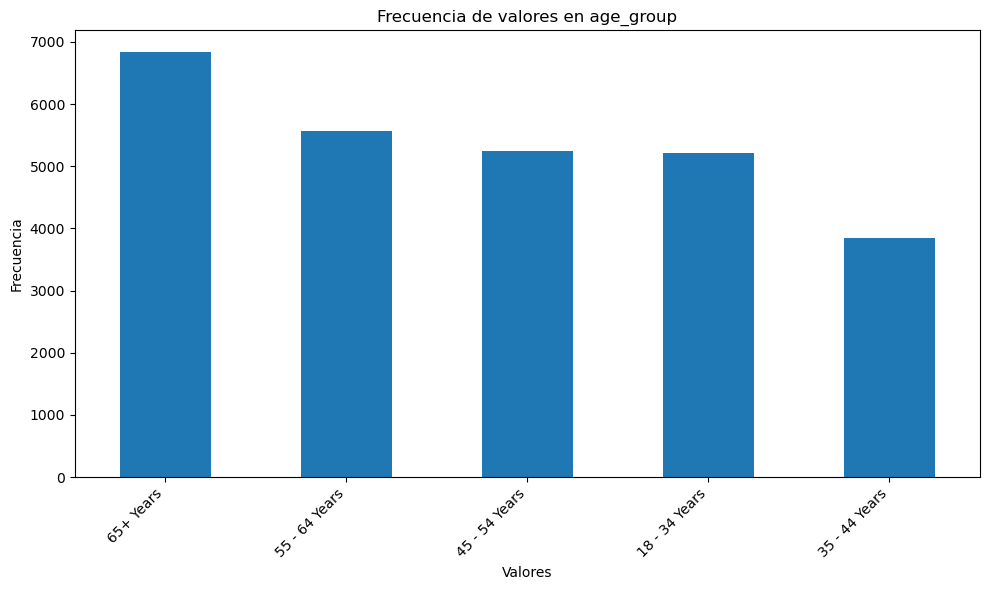

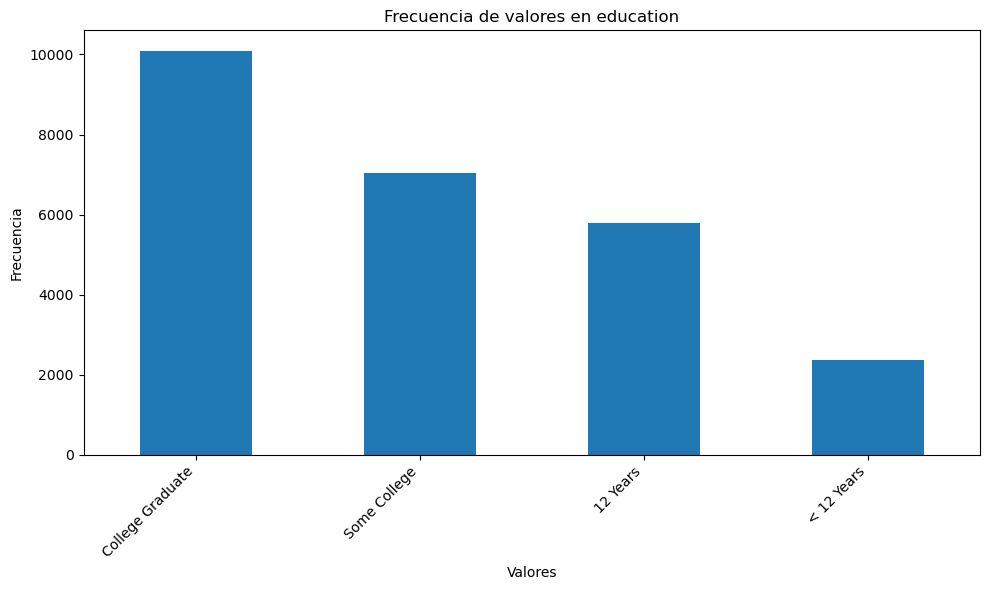

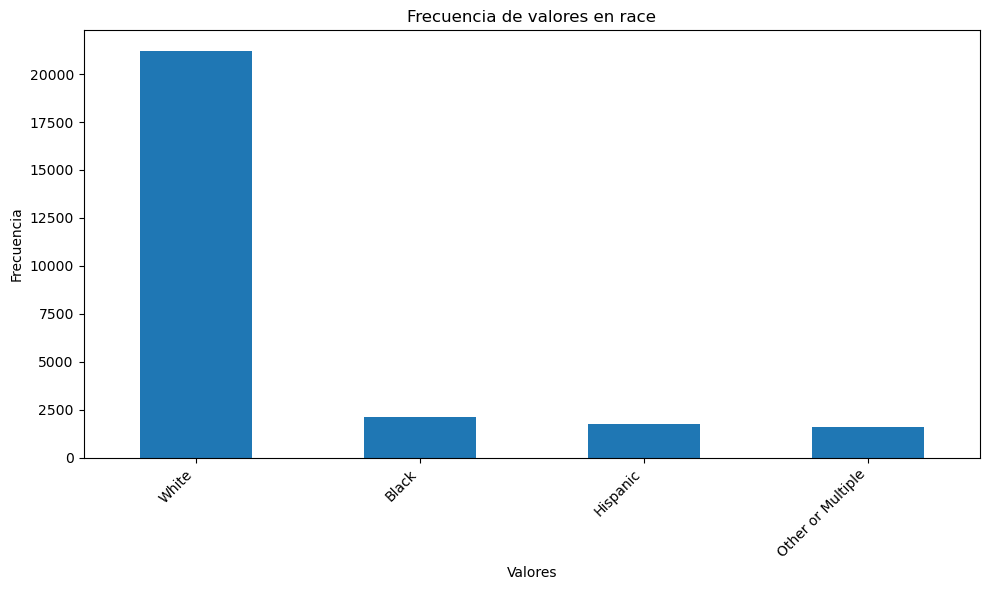

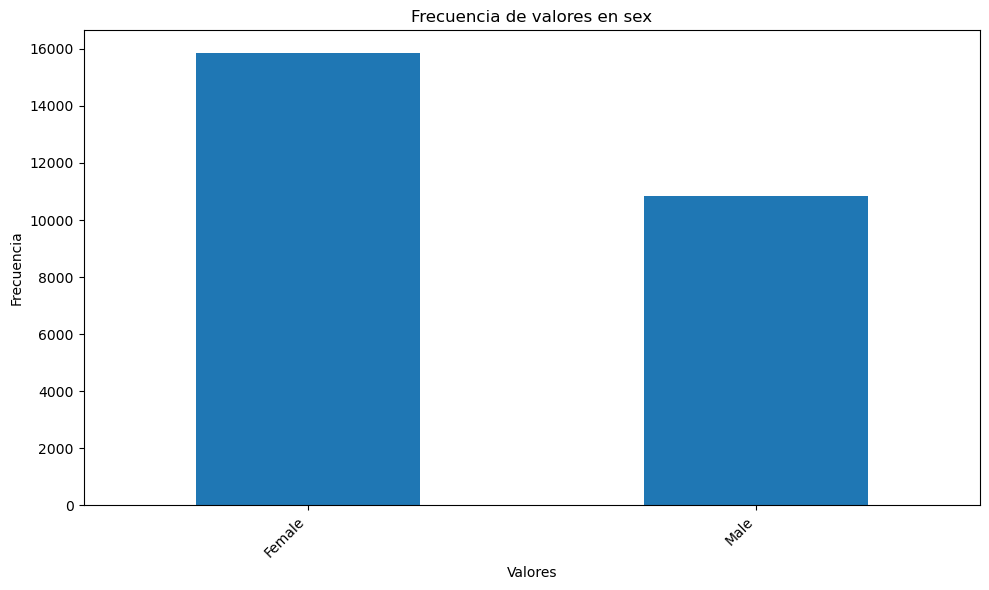

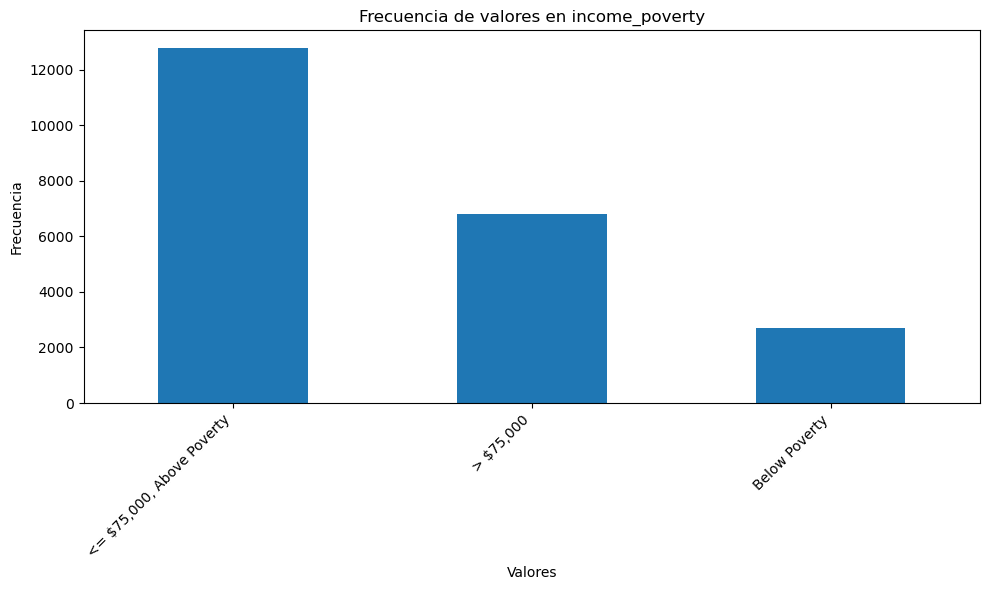

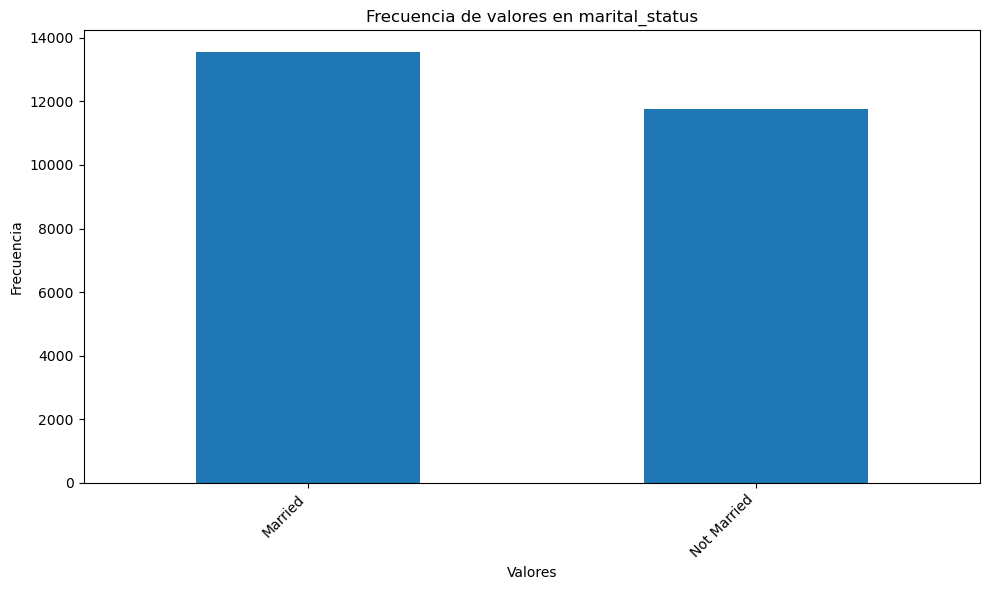

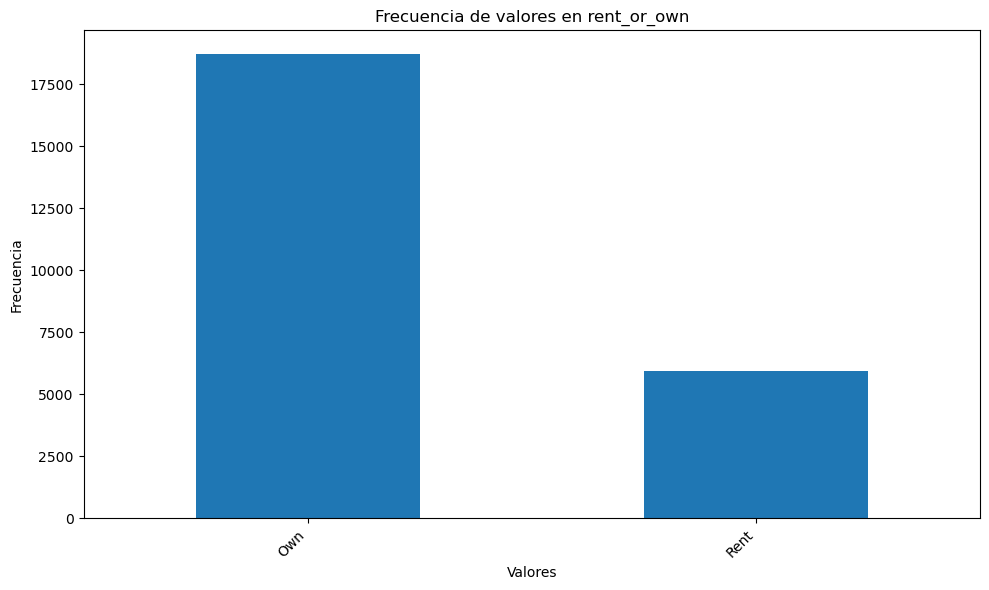

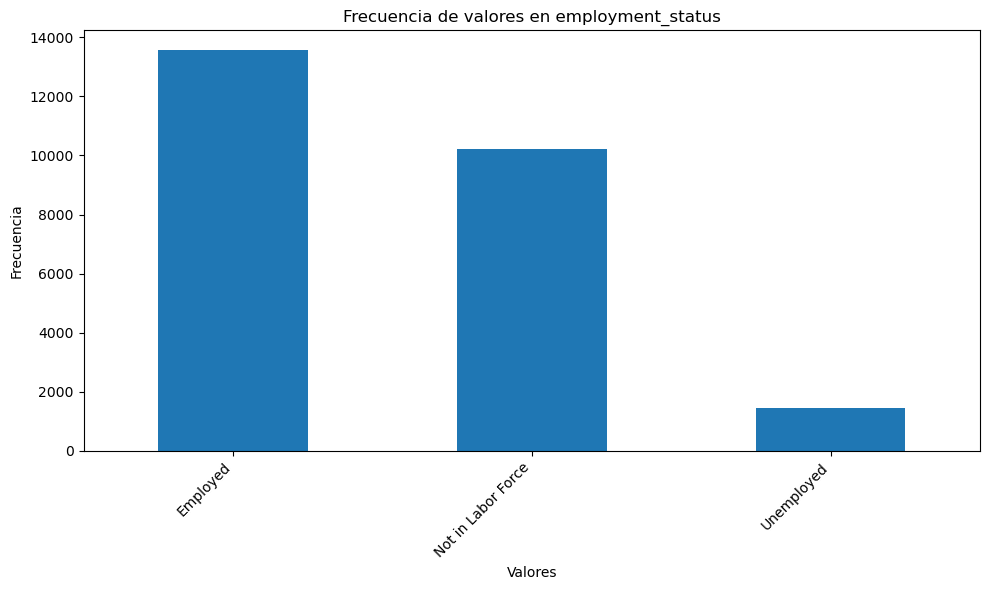

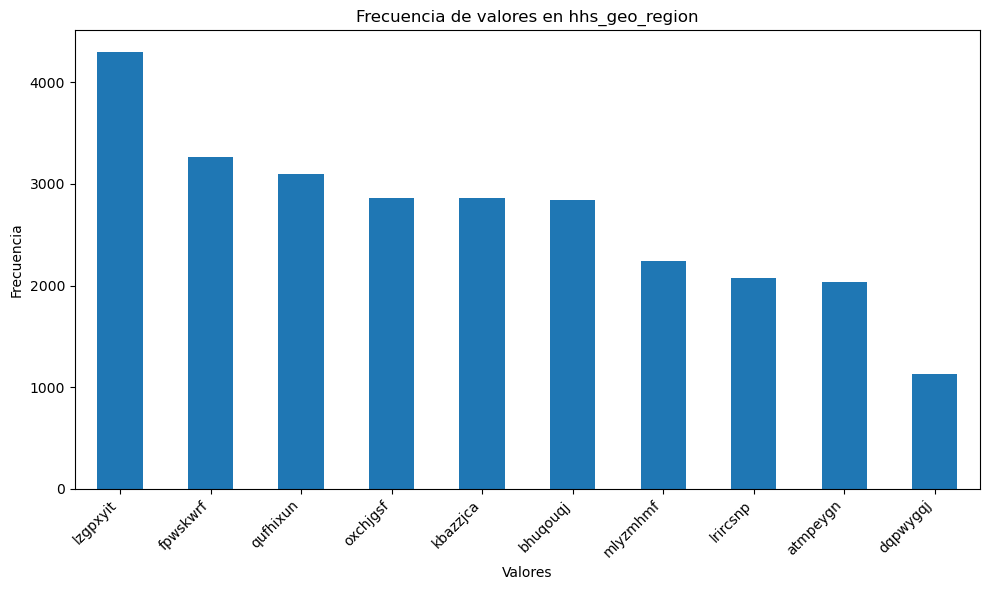

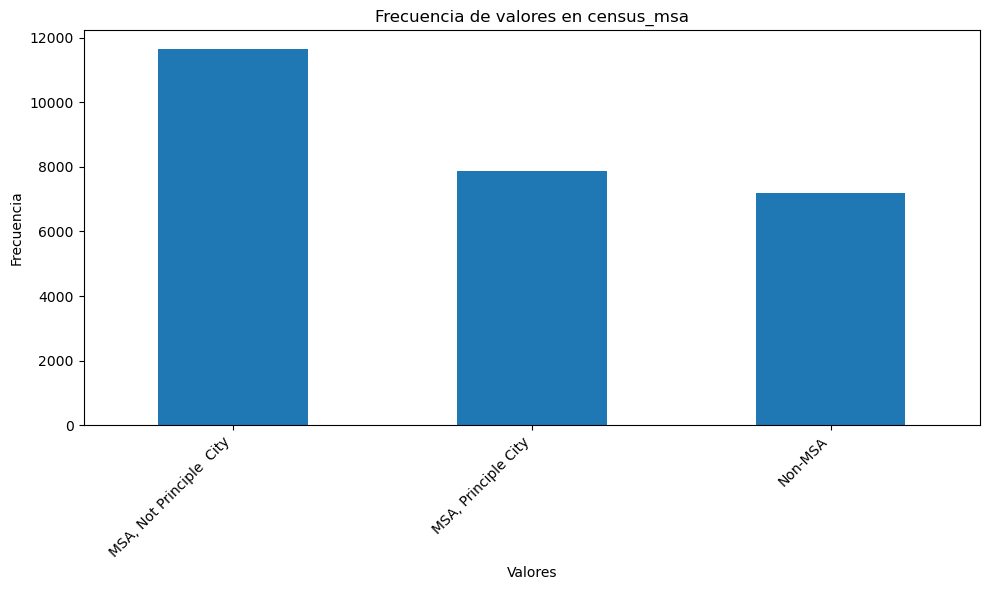

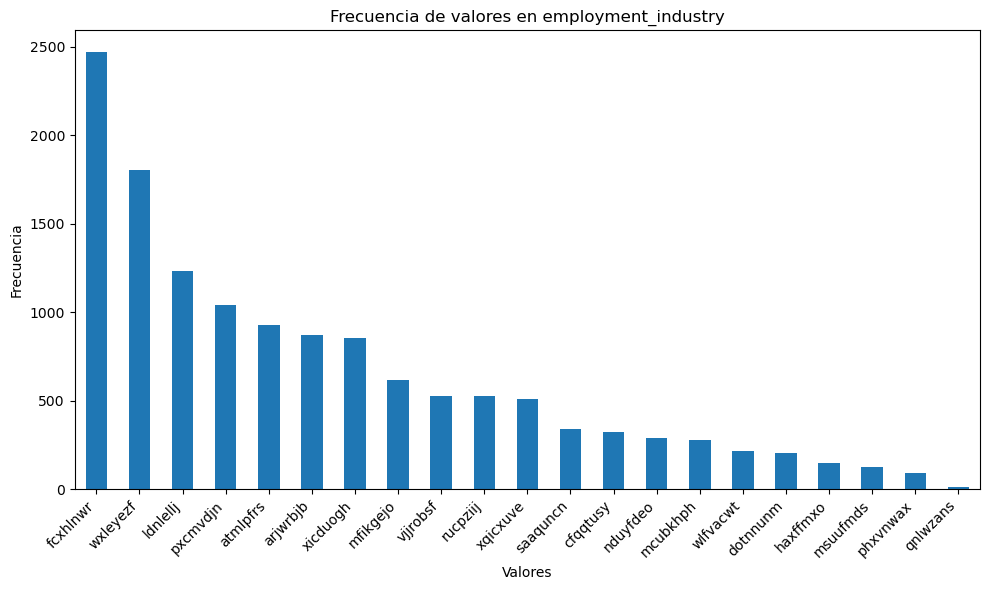

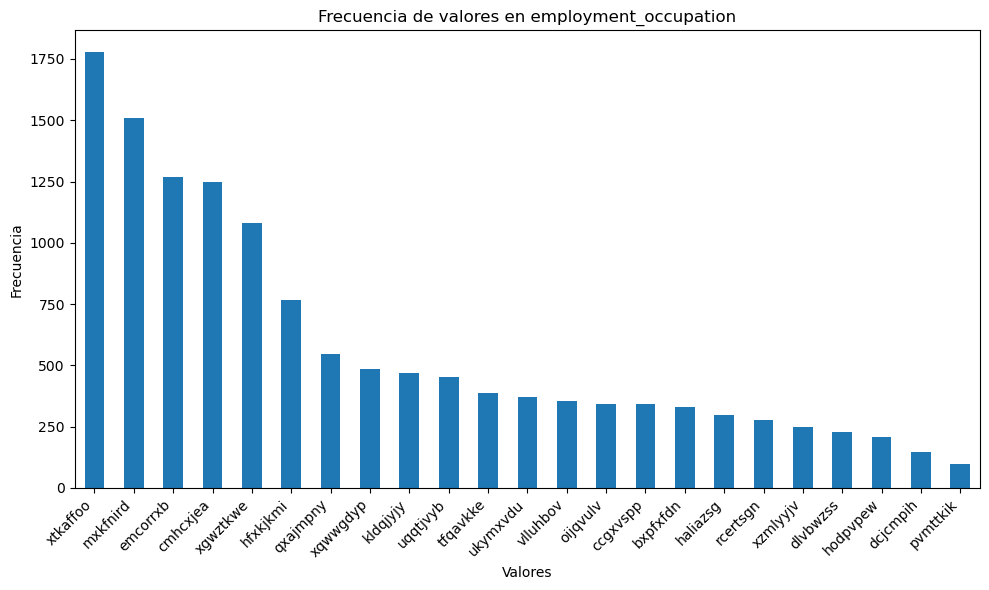

In [15]:
for col in merged_df.select_dtypes(include=['object']).columns:
    # Obtenemos las frecuencias de los valores
    value_counts = merged_df[col].value_counts()
    
    # Creamos el gráfico de barras
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Frecuencia de valores en {col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

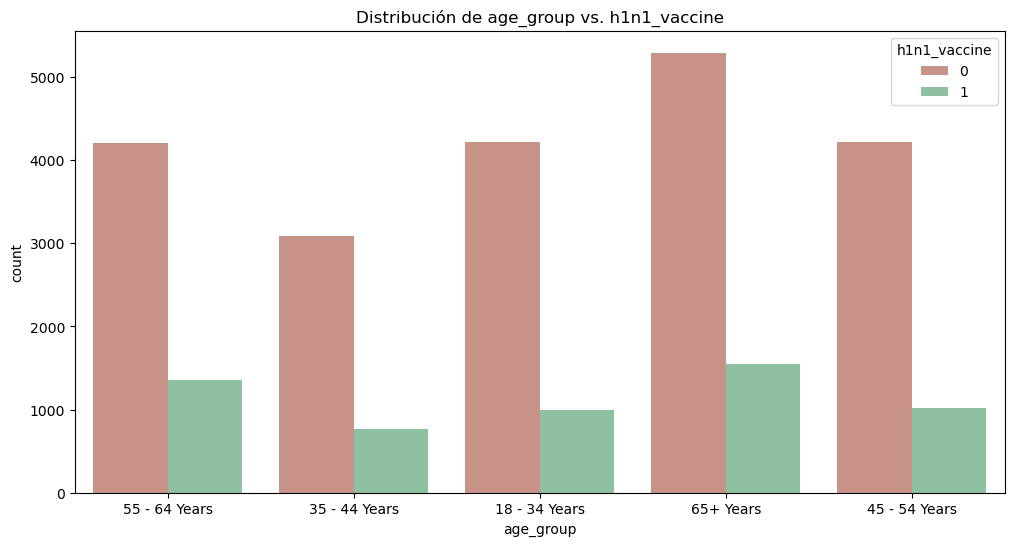

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='h1n1_vaccine', data=merged_df, palette=palette_h1n1_vaccine)
plt.title('Distribución de age_group vs. h1n1_vaccine')
plt.show()

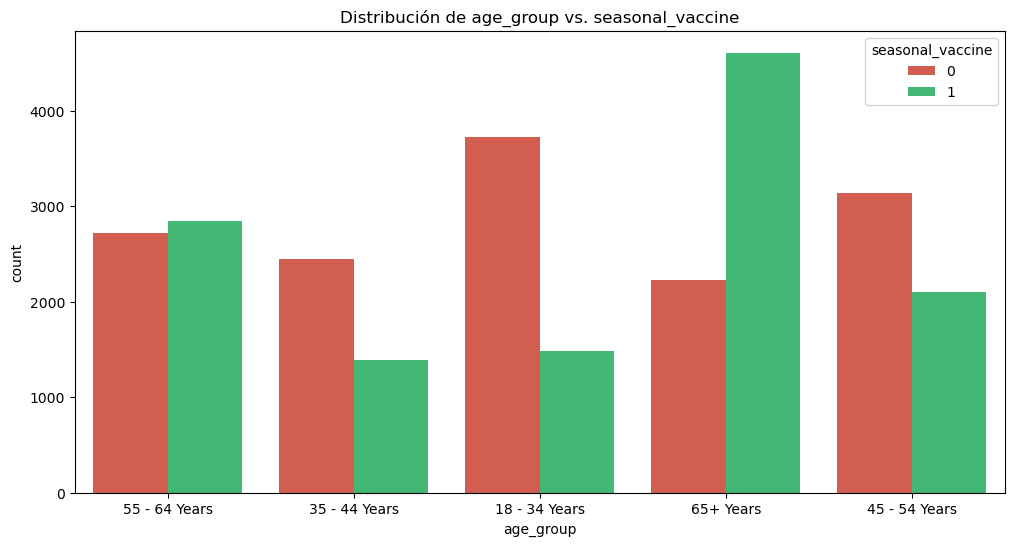

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='seasonal_vaccine', data=merged_df, palette=palette_seasonal_vaccine)
plt.title('Distribución de age_group vs. seasonal_vaccine')
plt.show()

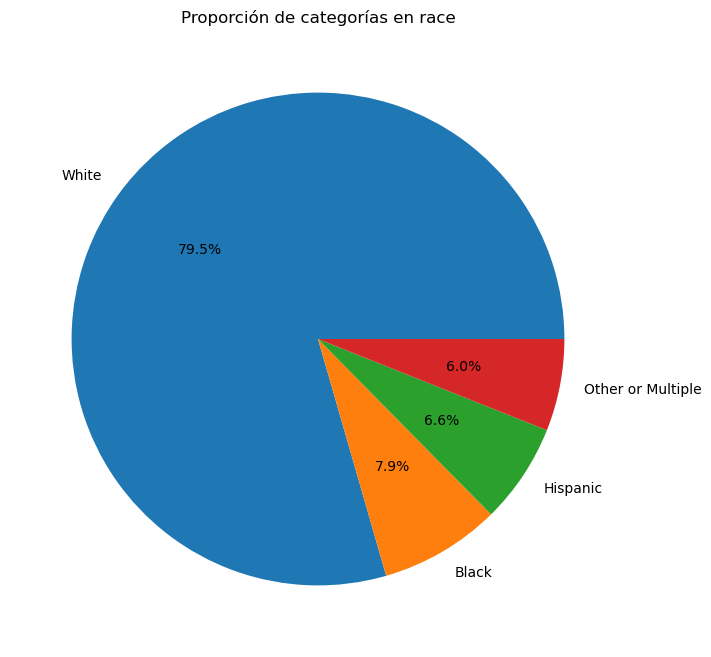

In [18]:
plt.figure(figsize=(8, 8))
merged_df['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporción de categorías en race')
plt.ylabel('')
plt.show()

In [19]:
colors_no_vaccine = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors_vaccine = ['#c2c2f0','#ffb3e6','#c4e17f','#ff6666']

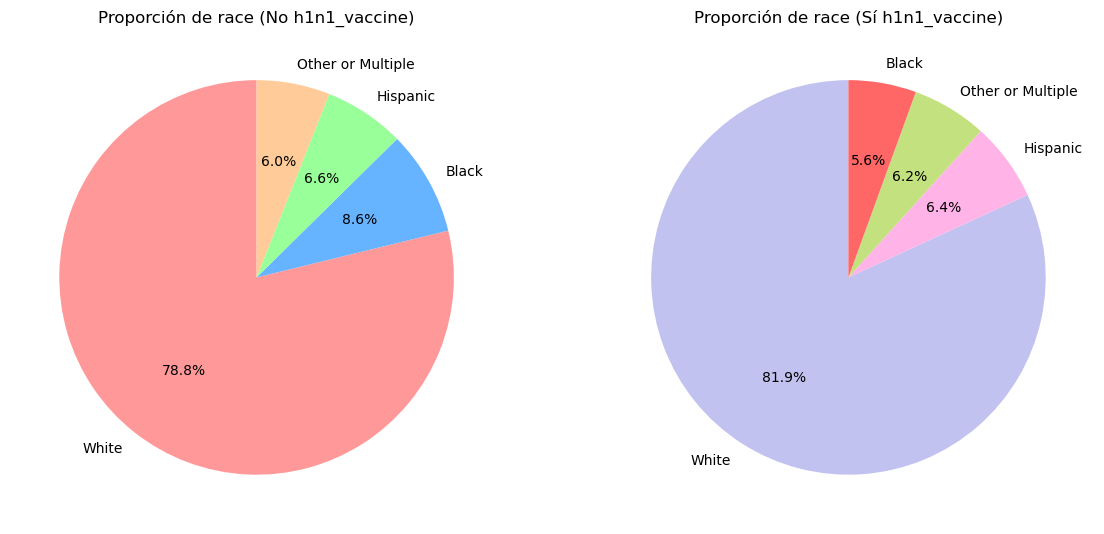

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

merged_df[merged_df['h1n1_vaccine'] == 0]['race'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90, colors=colors_no_vaccine)
ax[0].set_title('Proporción de race (No h1n1_vaccine)')
ax[0].set_ylabel('')

merged_df[merged_df['h1n1_vaccine'] == 1]['race'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90, colors=colors_vaccine)
ax[1].set_title('Proporción de race (Sí h1n1_vaccine)')
ax[1].set_ylabel('')

plt.show()

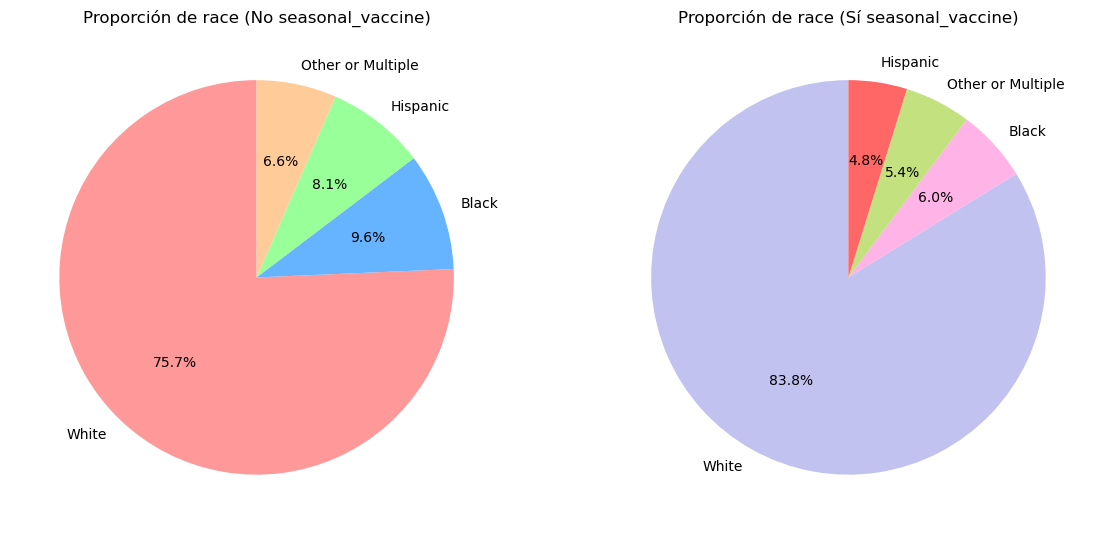

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

merged_df[merged_df['seasonal_vaccine'] == 0]['race'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90, colors=colors_no_vaccine)
ax[0].set_title('Proporción de race (No seasonal_vaccine)')
ax[0].set_ylabel('')

merged_df[merged_df['seasonal_vaccine'] == 1]['race'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90, colors=colors_vaccine)
ax[1].set_title('Proporción de race (Sí seasonal_vaccine)')
ax[1].set_ylabel('')

plt.show()

In [22]:
binary_columns = [col for col in merged_df.columns if merged_df[col].dropna().unique().tolist() in ([0, 1], [1, 0])]

In [23]:
# Número de columnas por fila
cols_per_row = 3

# Número total de gráficas
total_plots = len(binary_columns)

# Número de filas necesarias
num_figures = math.ceil(total_plots / cols_per_row)

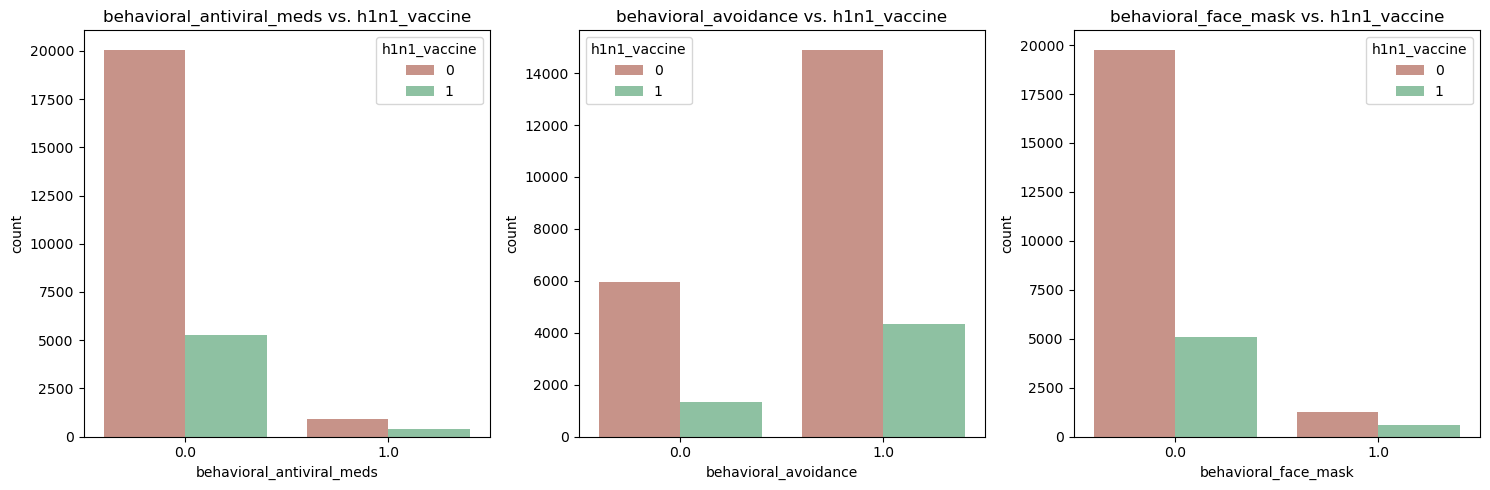

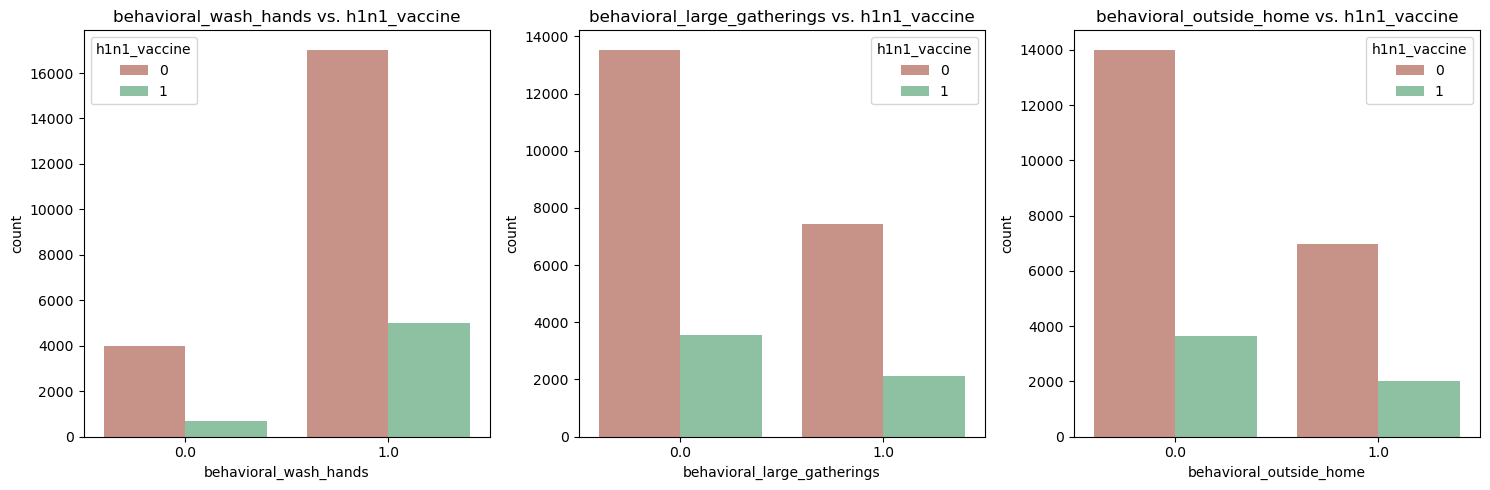

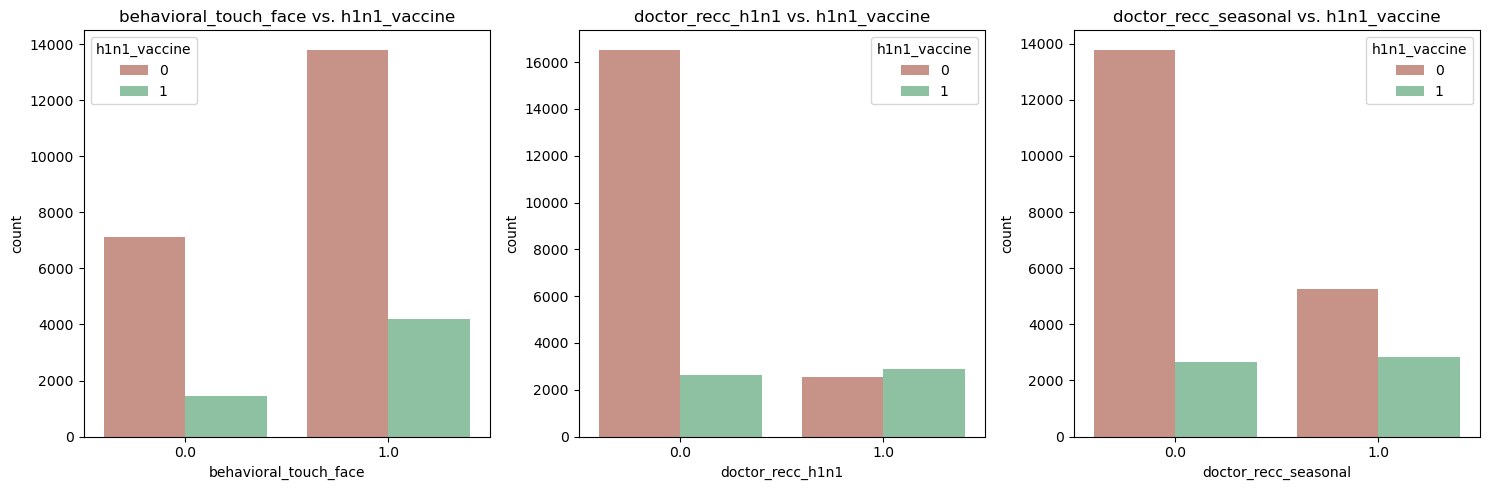

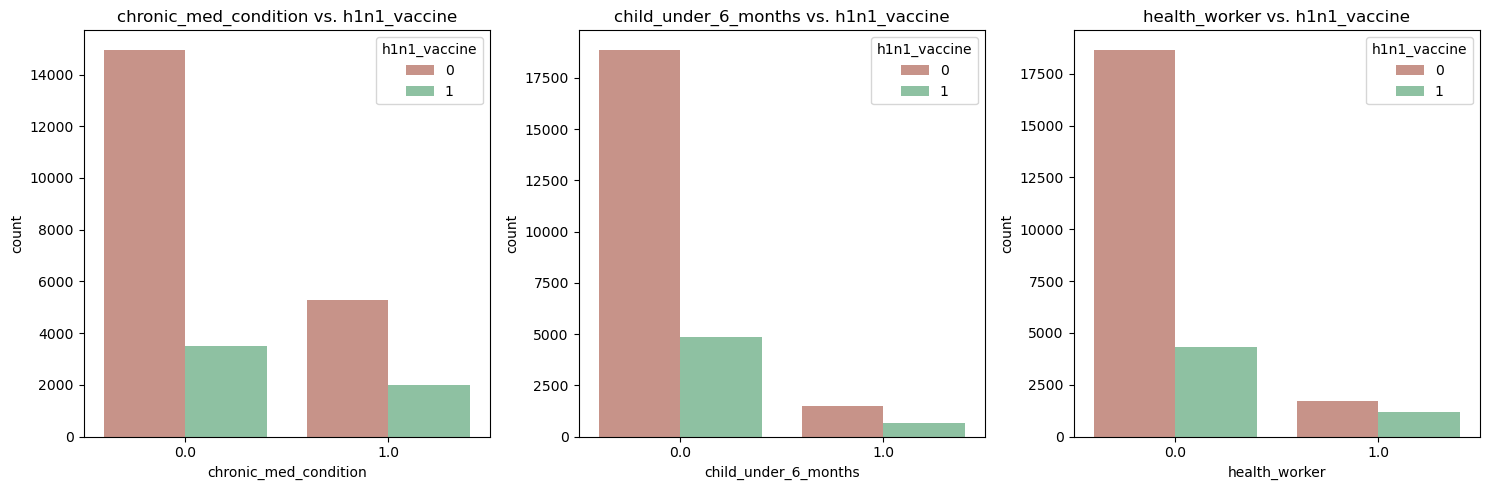

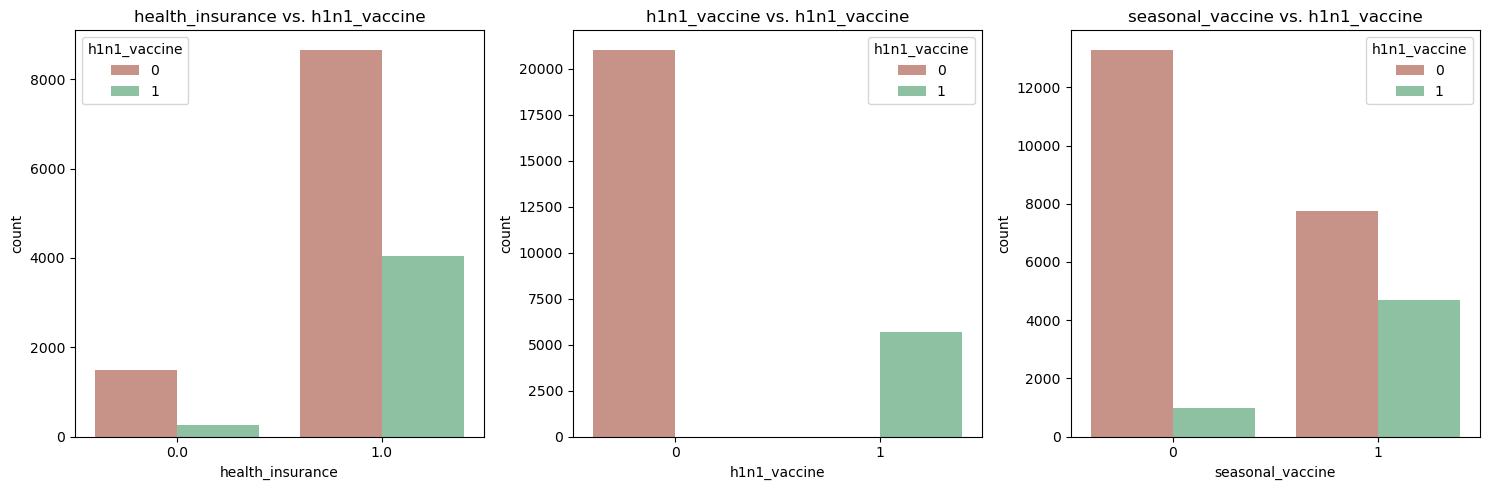

In [24]:
# Generar las figuras necesarias
for fig_num in range(num_figures):
    # Crear una nueva figura
    plt.figure(figsize=(15, 5))
    
    # Determinar el rango de columnas para esta figura
    start_idx = fig_num * cols_per_row
    end_idx = min(start_idx + cols_per_row, total_plots)
    
    for i, col in enumerate(binary_columns[start_idx:end_idx]):
        plt.subplot(1, cols_per_row, i+1)
        sns.countplot(x=col, hue='h1n1_vaccine', data=merged_df, palette=palette_h1n1_vaccine)
        plt.title(f'{col} vs. h1n1_vaccine')
    
    plt.tight_layout()
    plt.show()

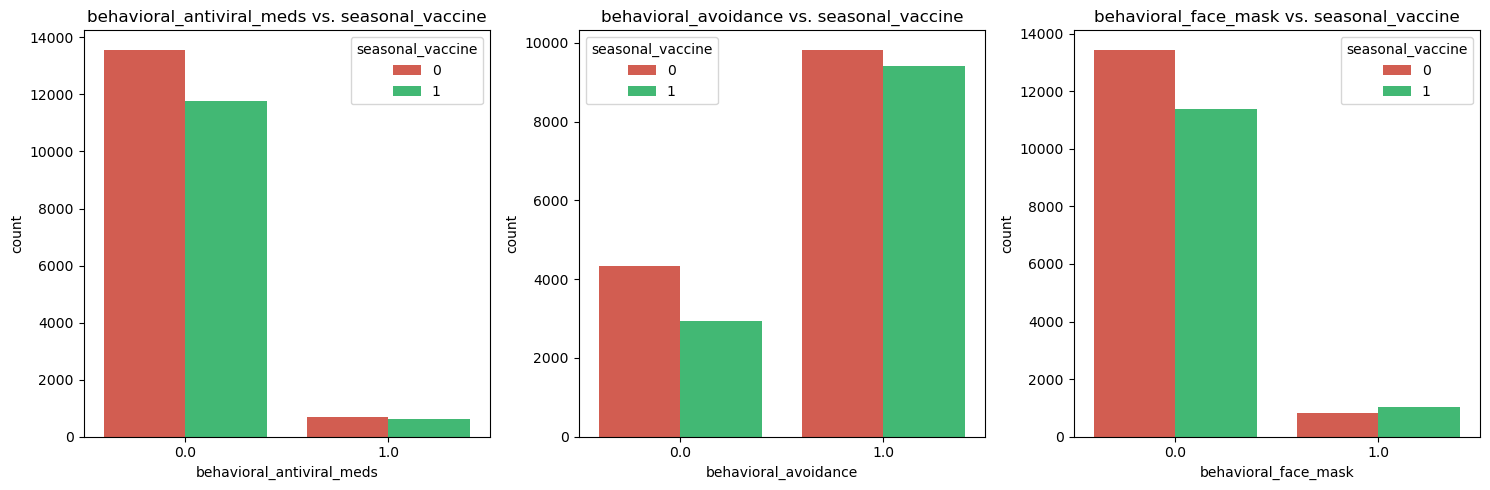

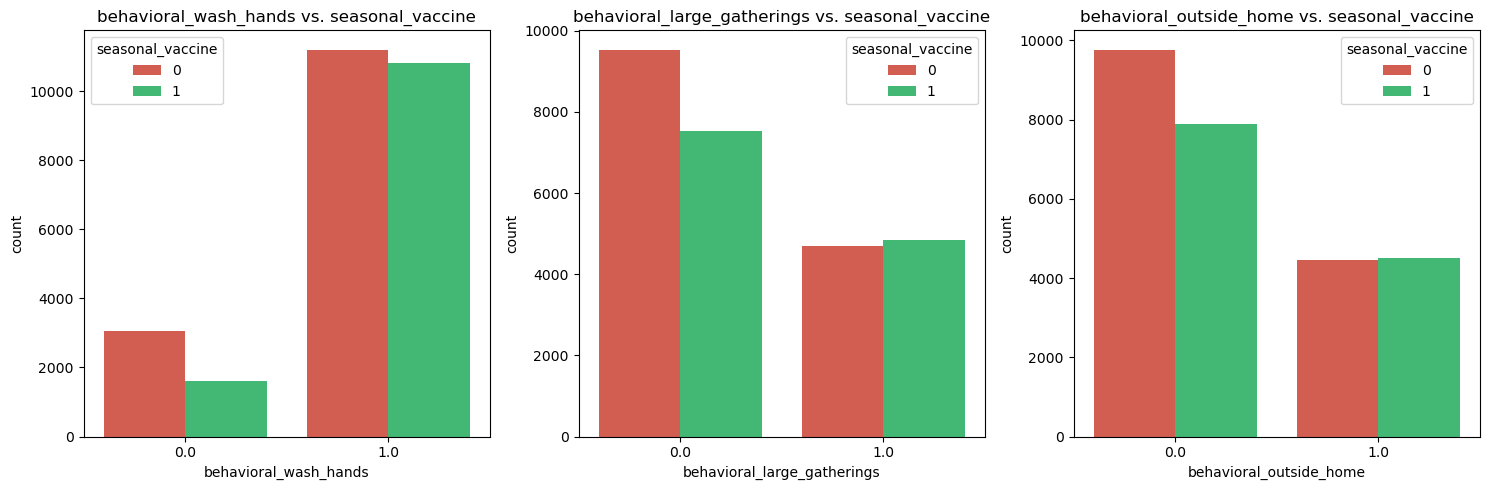

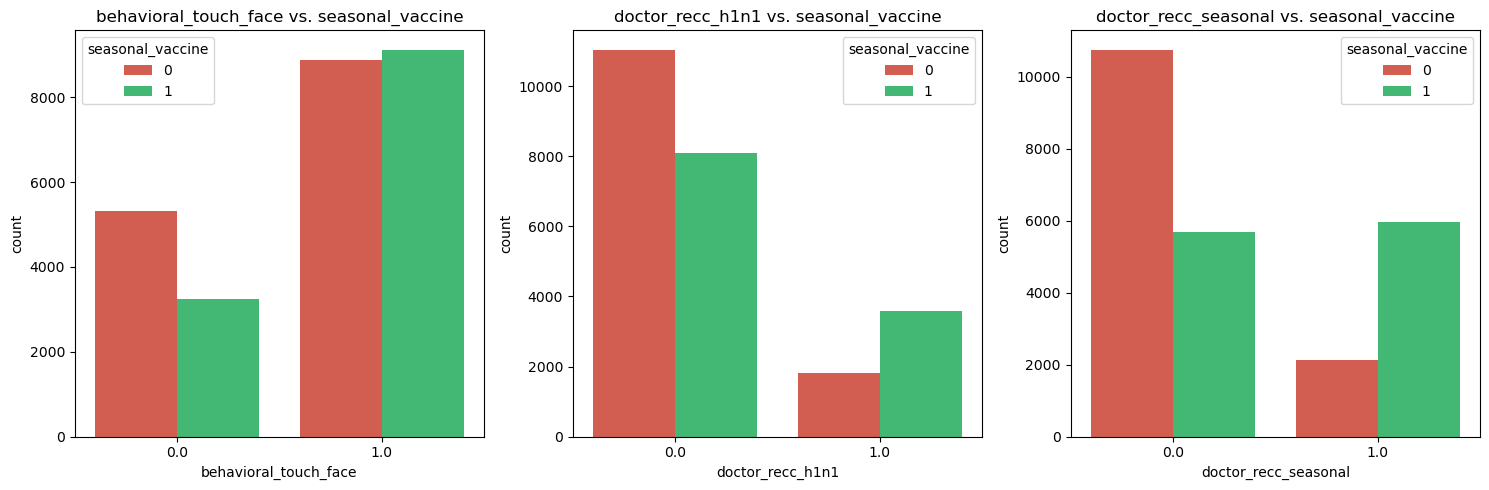

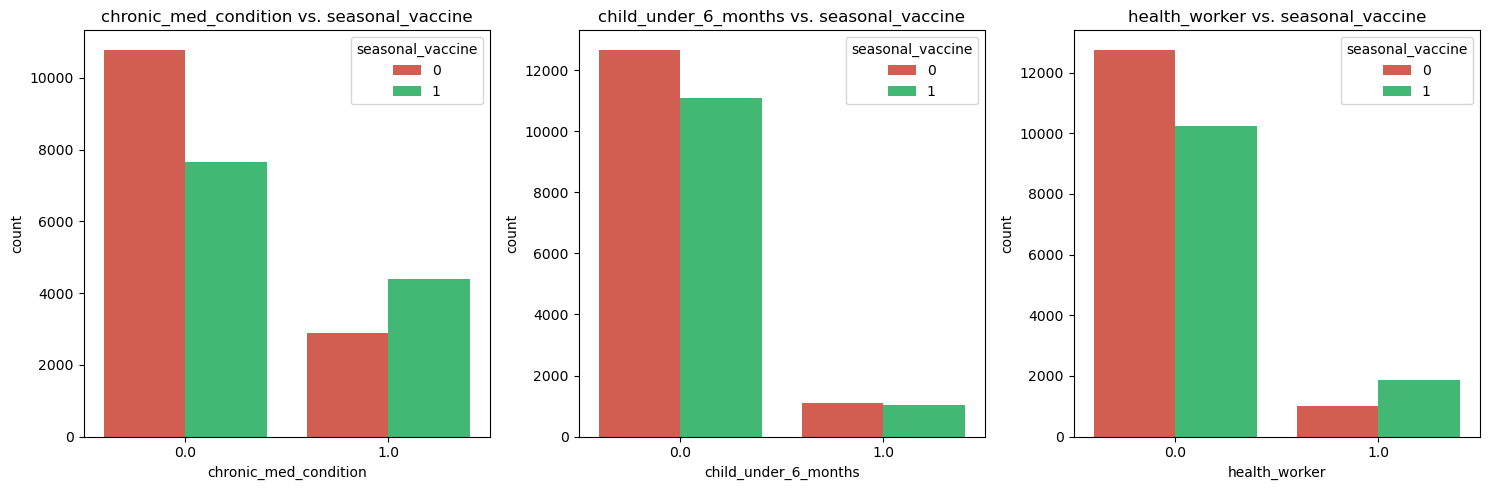

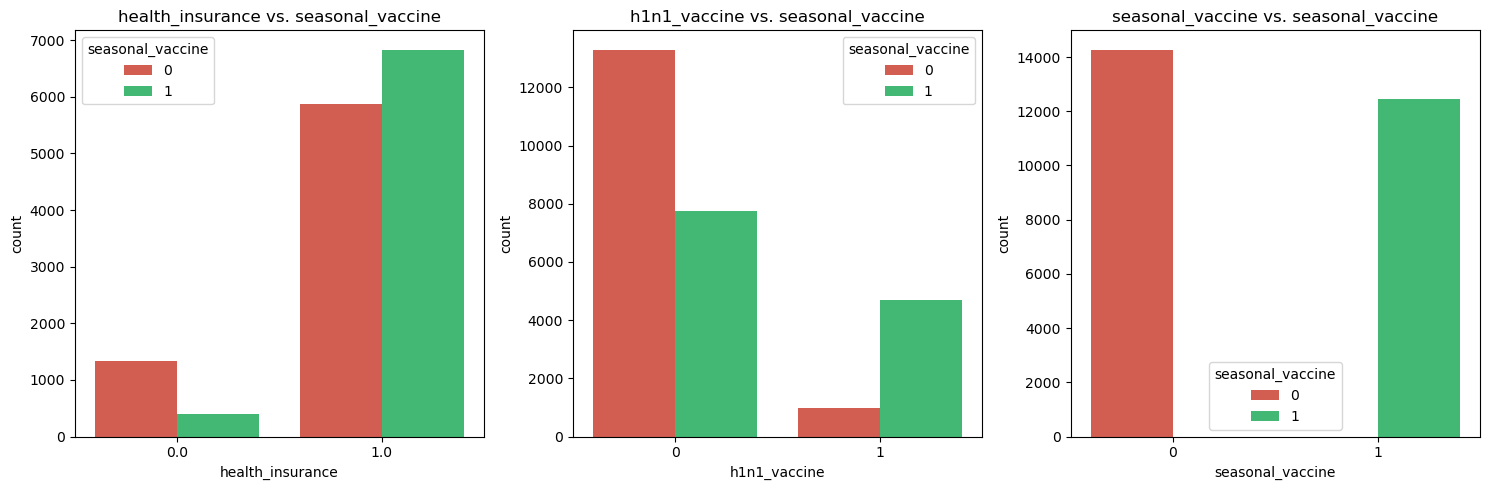

In [25]:
# Generar las figuras necesarias
for fig_num in range(num_figures):
    # Crear una nueva figura
    plt.figure(figsize=(15, 5))
    
    # Determinar el rango de columnas para esta figura
    start_idx = fig_num * cols_per_row
    end_idx = min(start_idx + cols_per_row, total_plots)
    
    for i, col in enumerate(binary_columns[start_idx:end_idx]):
        plt.subplot(1, cols_per_row, i+1)
        sns.countplot(x=col, hue='seasonal_vaccine', data=merged_df, palette=palette_seasonal_vaccine)
        plt.title(f'{col} vs. seasonal_vaccine')
    
    plt.tight_layout()
    plt.show()

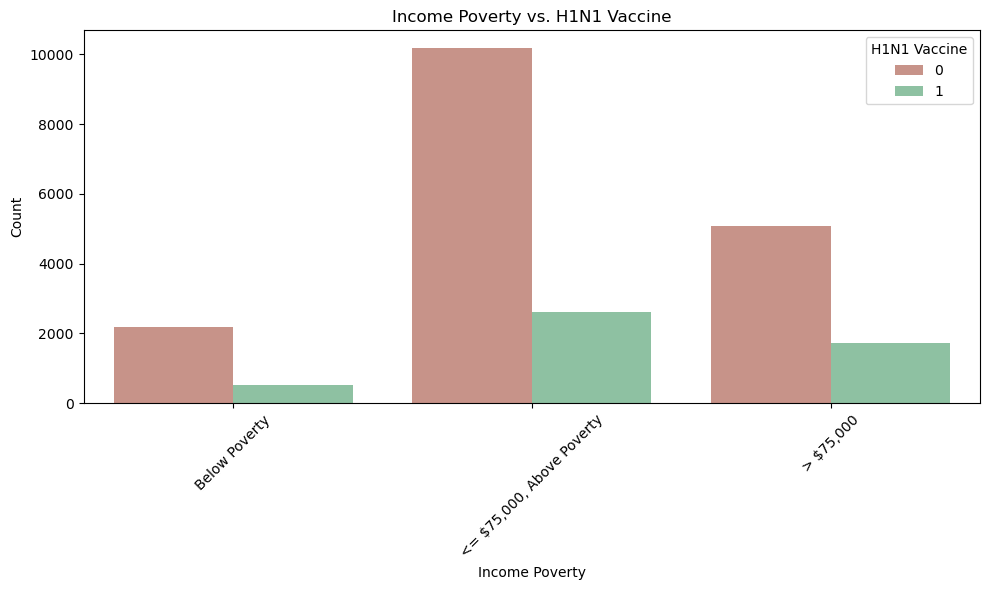

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income_poverty', hue='h1n1_vaccine', data=merged_df, palette=palette_h1n1_vaccine)
plt.title('Income Poverty vs. H1N1 Vaccine')
plt.xlabel('Income Poverty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='H1N1 Vaccine', loc='upper right')
plt.tight_layout()
plt.show()

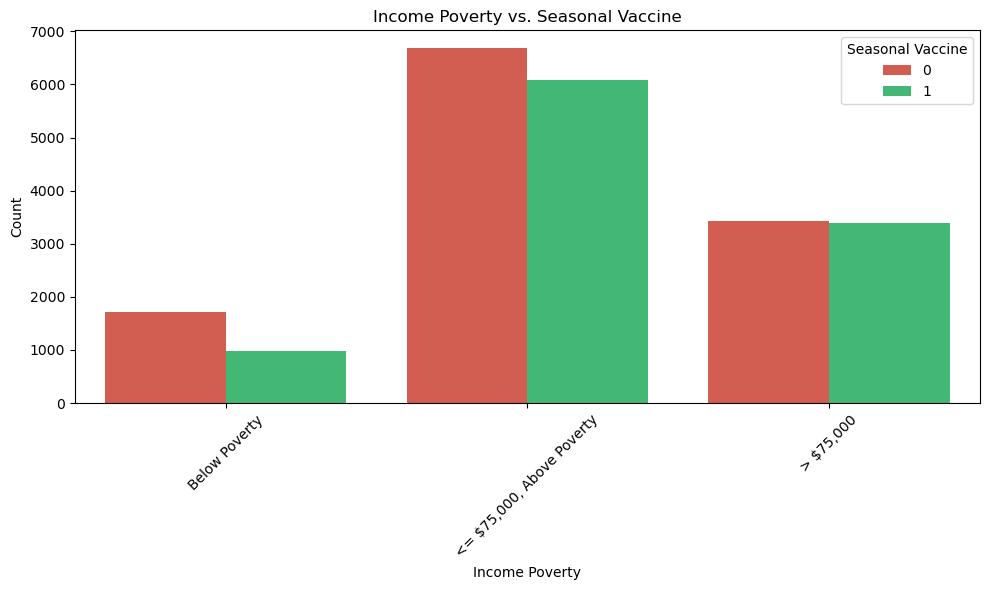

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income_poverty', hue='seasonal_vaccine', data=merged_df, palette=palette_seasonal_vaccine)
plt.title('Income Poverty vs. Seasonal Vaccine')
plt.xlabel('Income Poverty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Seasonal Vaccine', loc='upper right')
plt.tight_layout()
plt.show()

In [28]:
view_sweetviz_h1n1_vaccine = False
view_sweetviz_seasonal_vaccine = False

In [29]:
if view_sweetviz_h1n1_vaccine:
    report_h1n1_vaccine = sv.analyze(merged_df, target_feat='h1n1_vaccine')

    report_h1n1_vaccine.show_notebook(layout="widescreen")

In [30]:
if view_sweetviz_seasonal_vaccine:
    report_seasonal_vaccine = sv.analyze(merged_df, target_feat='seasonal_vaccine')

    report_seasonal_vaccine.show_notebook(layout="widescreen")

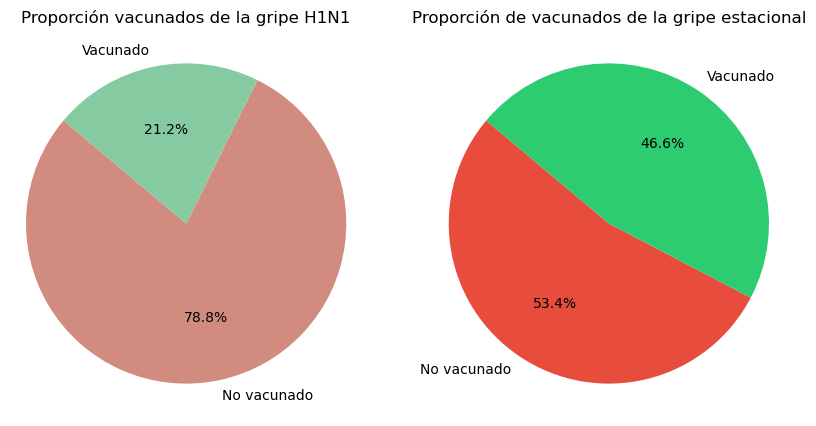

In [31]:
# Función para etiquetar los valores de los gráficos de tarta
def label_function(val):
    return 'Vacunado' if val == 1 else 'No vacunado'

# Contamos la cantidad de vacunados (valor 1) y no vacunados (valor 0) para cada vacuna
h1n1_counts = merged_df['h1n1_vaccine'].value_counts()
seasonal_counts = merged_df['seasonal_vaccine'].value_counts()

# Creamos el primer gráfico de tarta para h1n1_vaccine
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(h1n1_counts, labels=h1n1_counts.index.map(label_function), autopct='%1.1f%%', startangle=140, colors=palette_h1n1_vaccine)
plt.title('Proporción vacunados de la gripe H1N1')
plt.axis('equal')

# Creamos el segundo gráfico de tarta para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.pie(seasonal_counts, labels=seasonal_counts.index.map(label_function), autopct='%1.1f%%', startangle=140, colors=palette_seasonal_vaccine)
plt.title('Proporción de vacunados de la gripe estacional')
plt.axis('equal')

plt.show()

# Conversión de datos

In [32]:
df_for_label_encoder = pd.concat([merged_df, test])

categorical_columns = df_for_label_encoder.select_dtypes(include=['object'])

encoders = {}

for col in categorical_columns.columns:
    le = LabelEncoder()
    le.fit_transform(df_for_label_encoder[col])
    encoders[col] = le 
    
for col, le in encoders.items():
    merged_df[col] = le.transform(merged_df[col])

In [33]:
for col in categorical_columns.columns:
    print(col)
    
for col in categorical_columns.columns:
    print(encoders[col].classes_)

age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region
census_msa
employment_industry
employment_occupation
['18 - 34 Years' '35 - 44 Years' '45 - 54 Years' '55 - 64 Years'
 '65+ Years']
['12 Years' '< 12 Years' 'College Graduate' 'Some College' nan]
['Black' 'Hispanic' 'Other or Multiple' 'White']
['Female' 'Male']
['<= $75,000, Above Poverty' '> $75,000' 'Below Poverty' nan]
['Married' 'Not Married' nan]
['Own' 'Rent' nan]
['Employed' 'Not in Labor Force' 'Unemployed' nan]
['atmpeygn' 'bhuqouqj' 'dqpwygqj' 'fpwskwrf' 'kbazzjca' 'lrircsnp'
 'lzgpxyit' 'mlyzmhmf' 'oxchjgsf' 'qufhixun']
['MSA, Not Principle  City' 'MSA, Principle City' 'Non-MSA']
['arjwrbjb' 'atmlpfrs' 'cfqqtusy' 'dotnnunm' 'fcxhlnwr' 'haxffmxo'
 'ldnlellj' 'mcubkhph' 'mfikgejo' 'msuufmds' 'nduyfdeo' 'phxvnwax'
 'pxcmvdjn' 'qnlwzans' 'rucpziij' 'saaquncn' 'vjjrobsf' 'wlfvacwt'
 'wxleyezf' 'xicduogh' 'xqicxuve' nan]
['bxpfxfdn' 'ccgxvspp' 'cmhcxjea' 'dcjcmpih' 'dlvbwzss' '

# Matriz de correlación

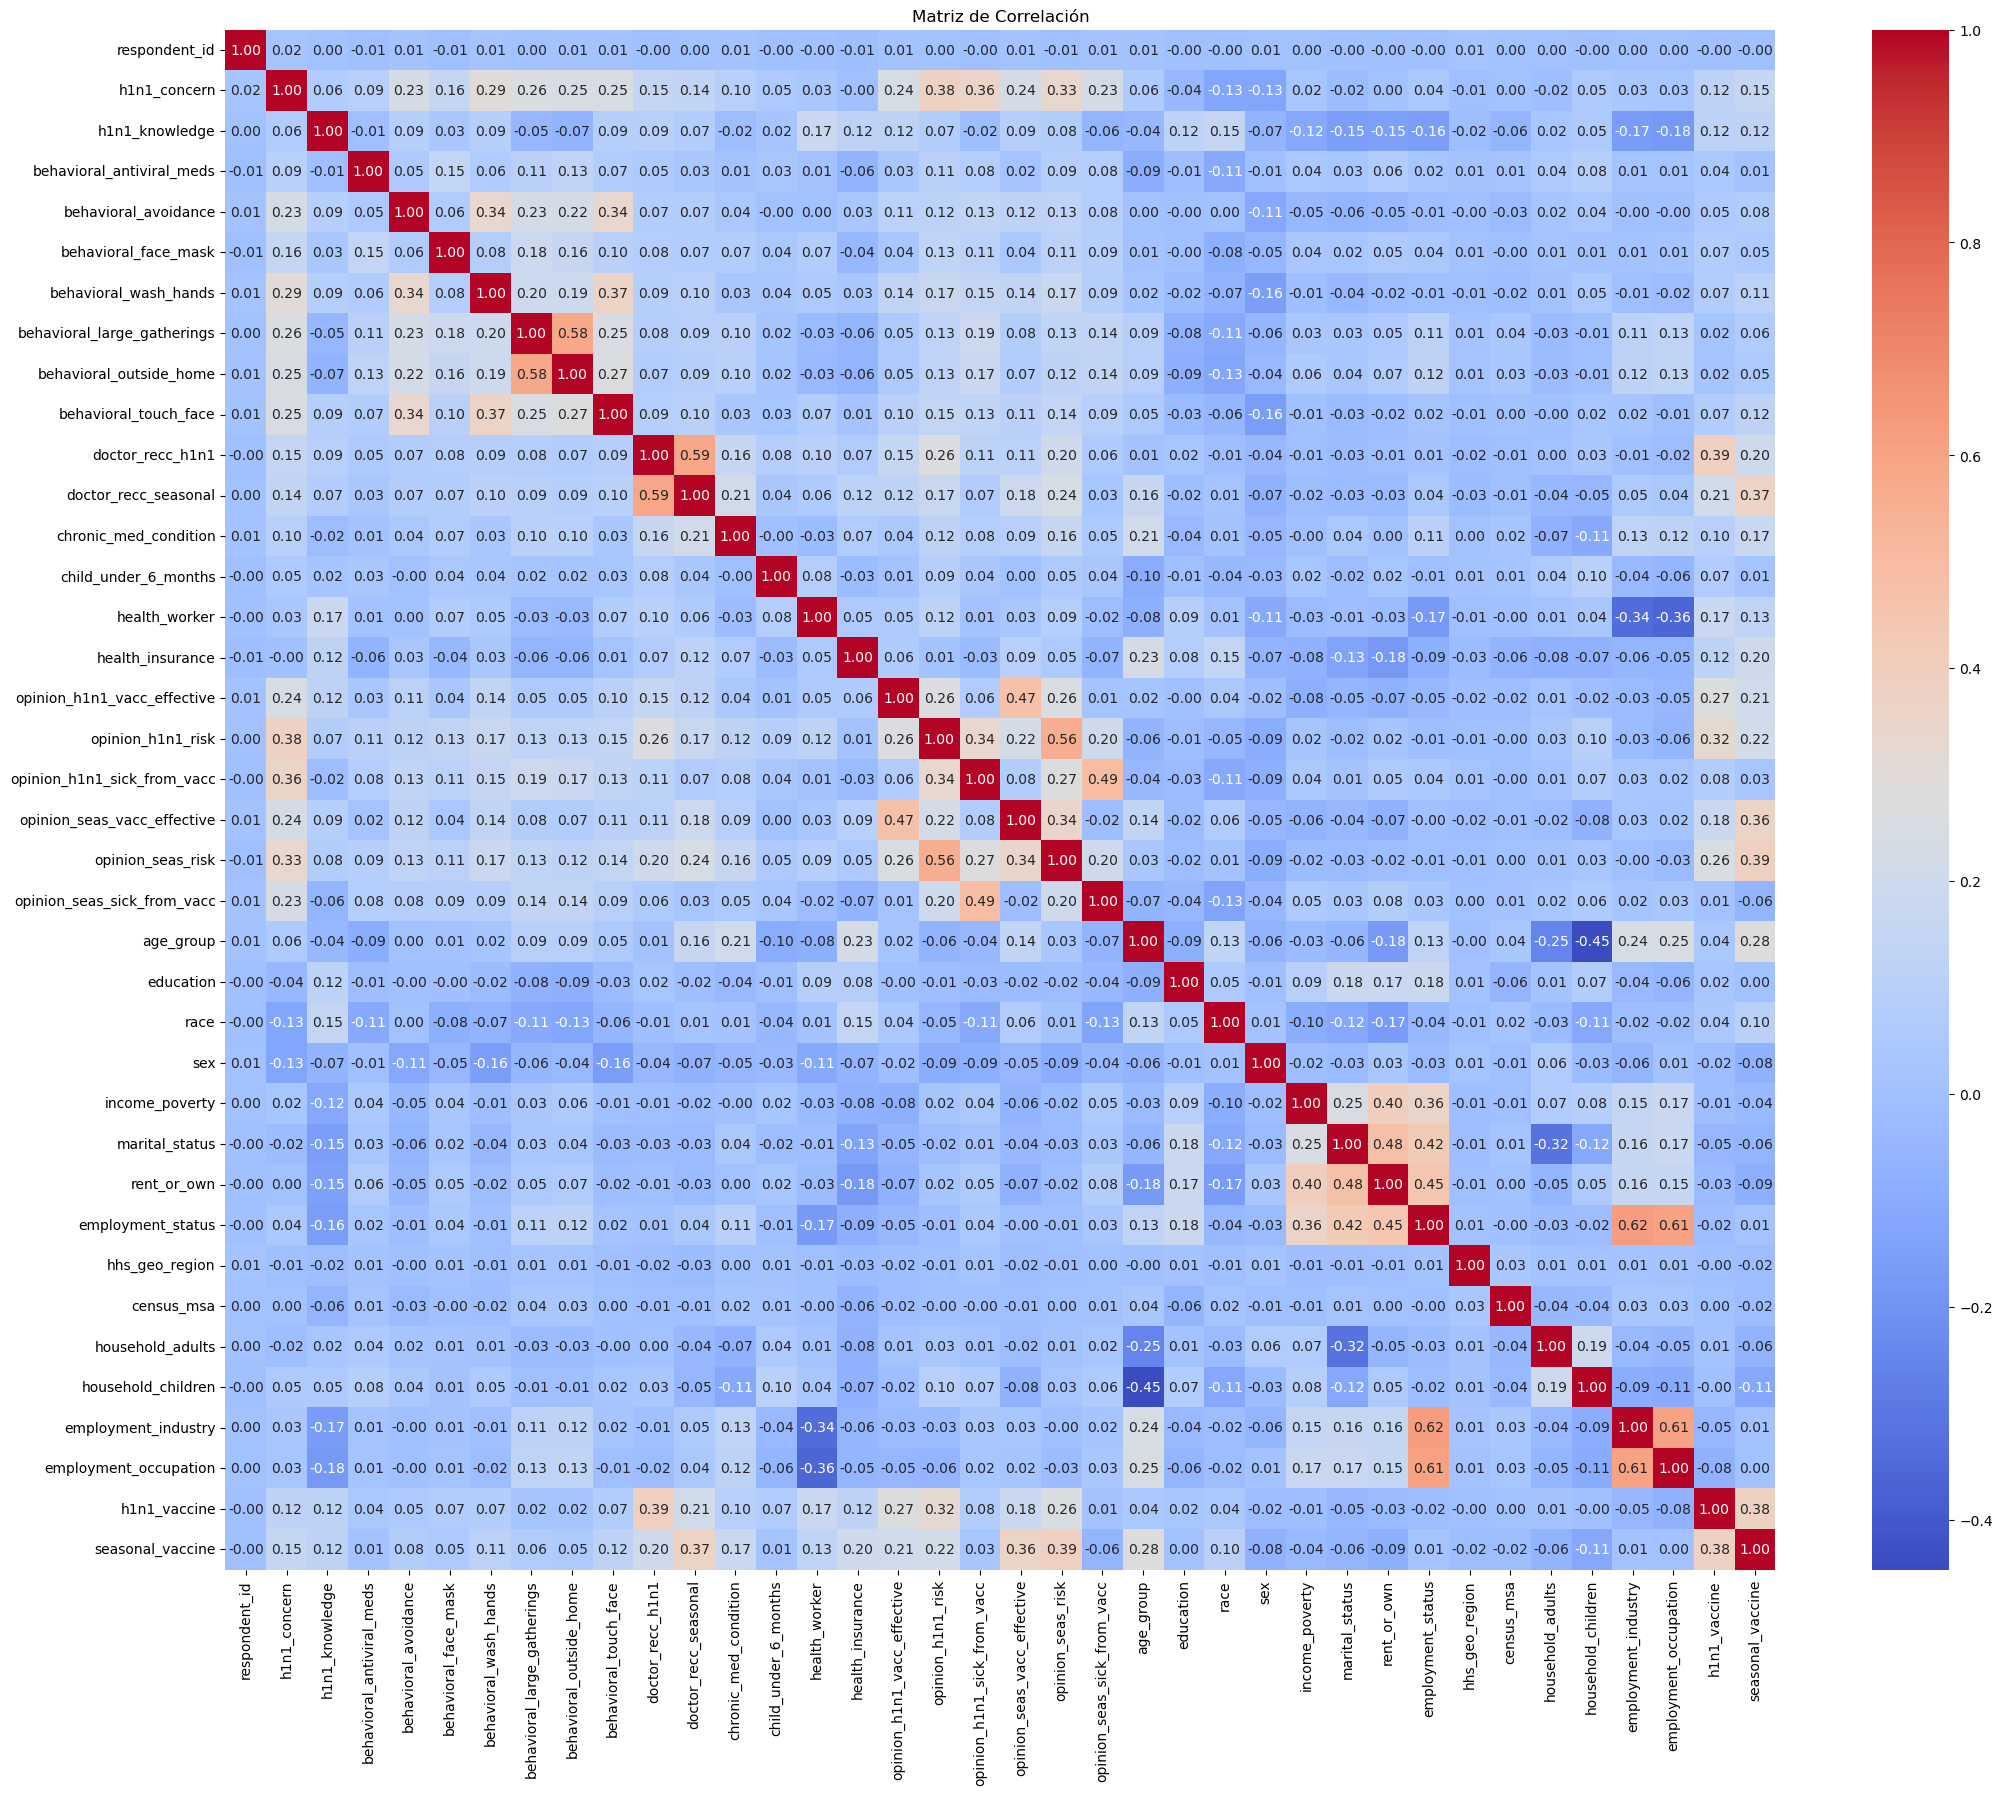

In [34]:
correlation_matrix = merged_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

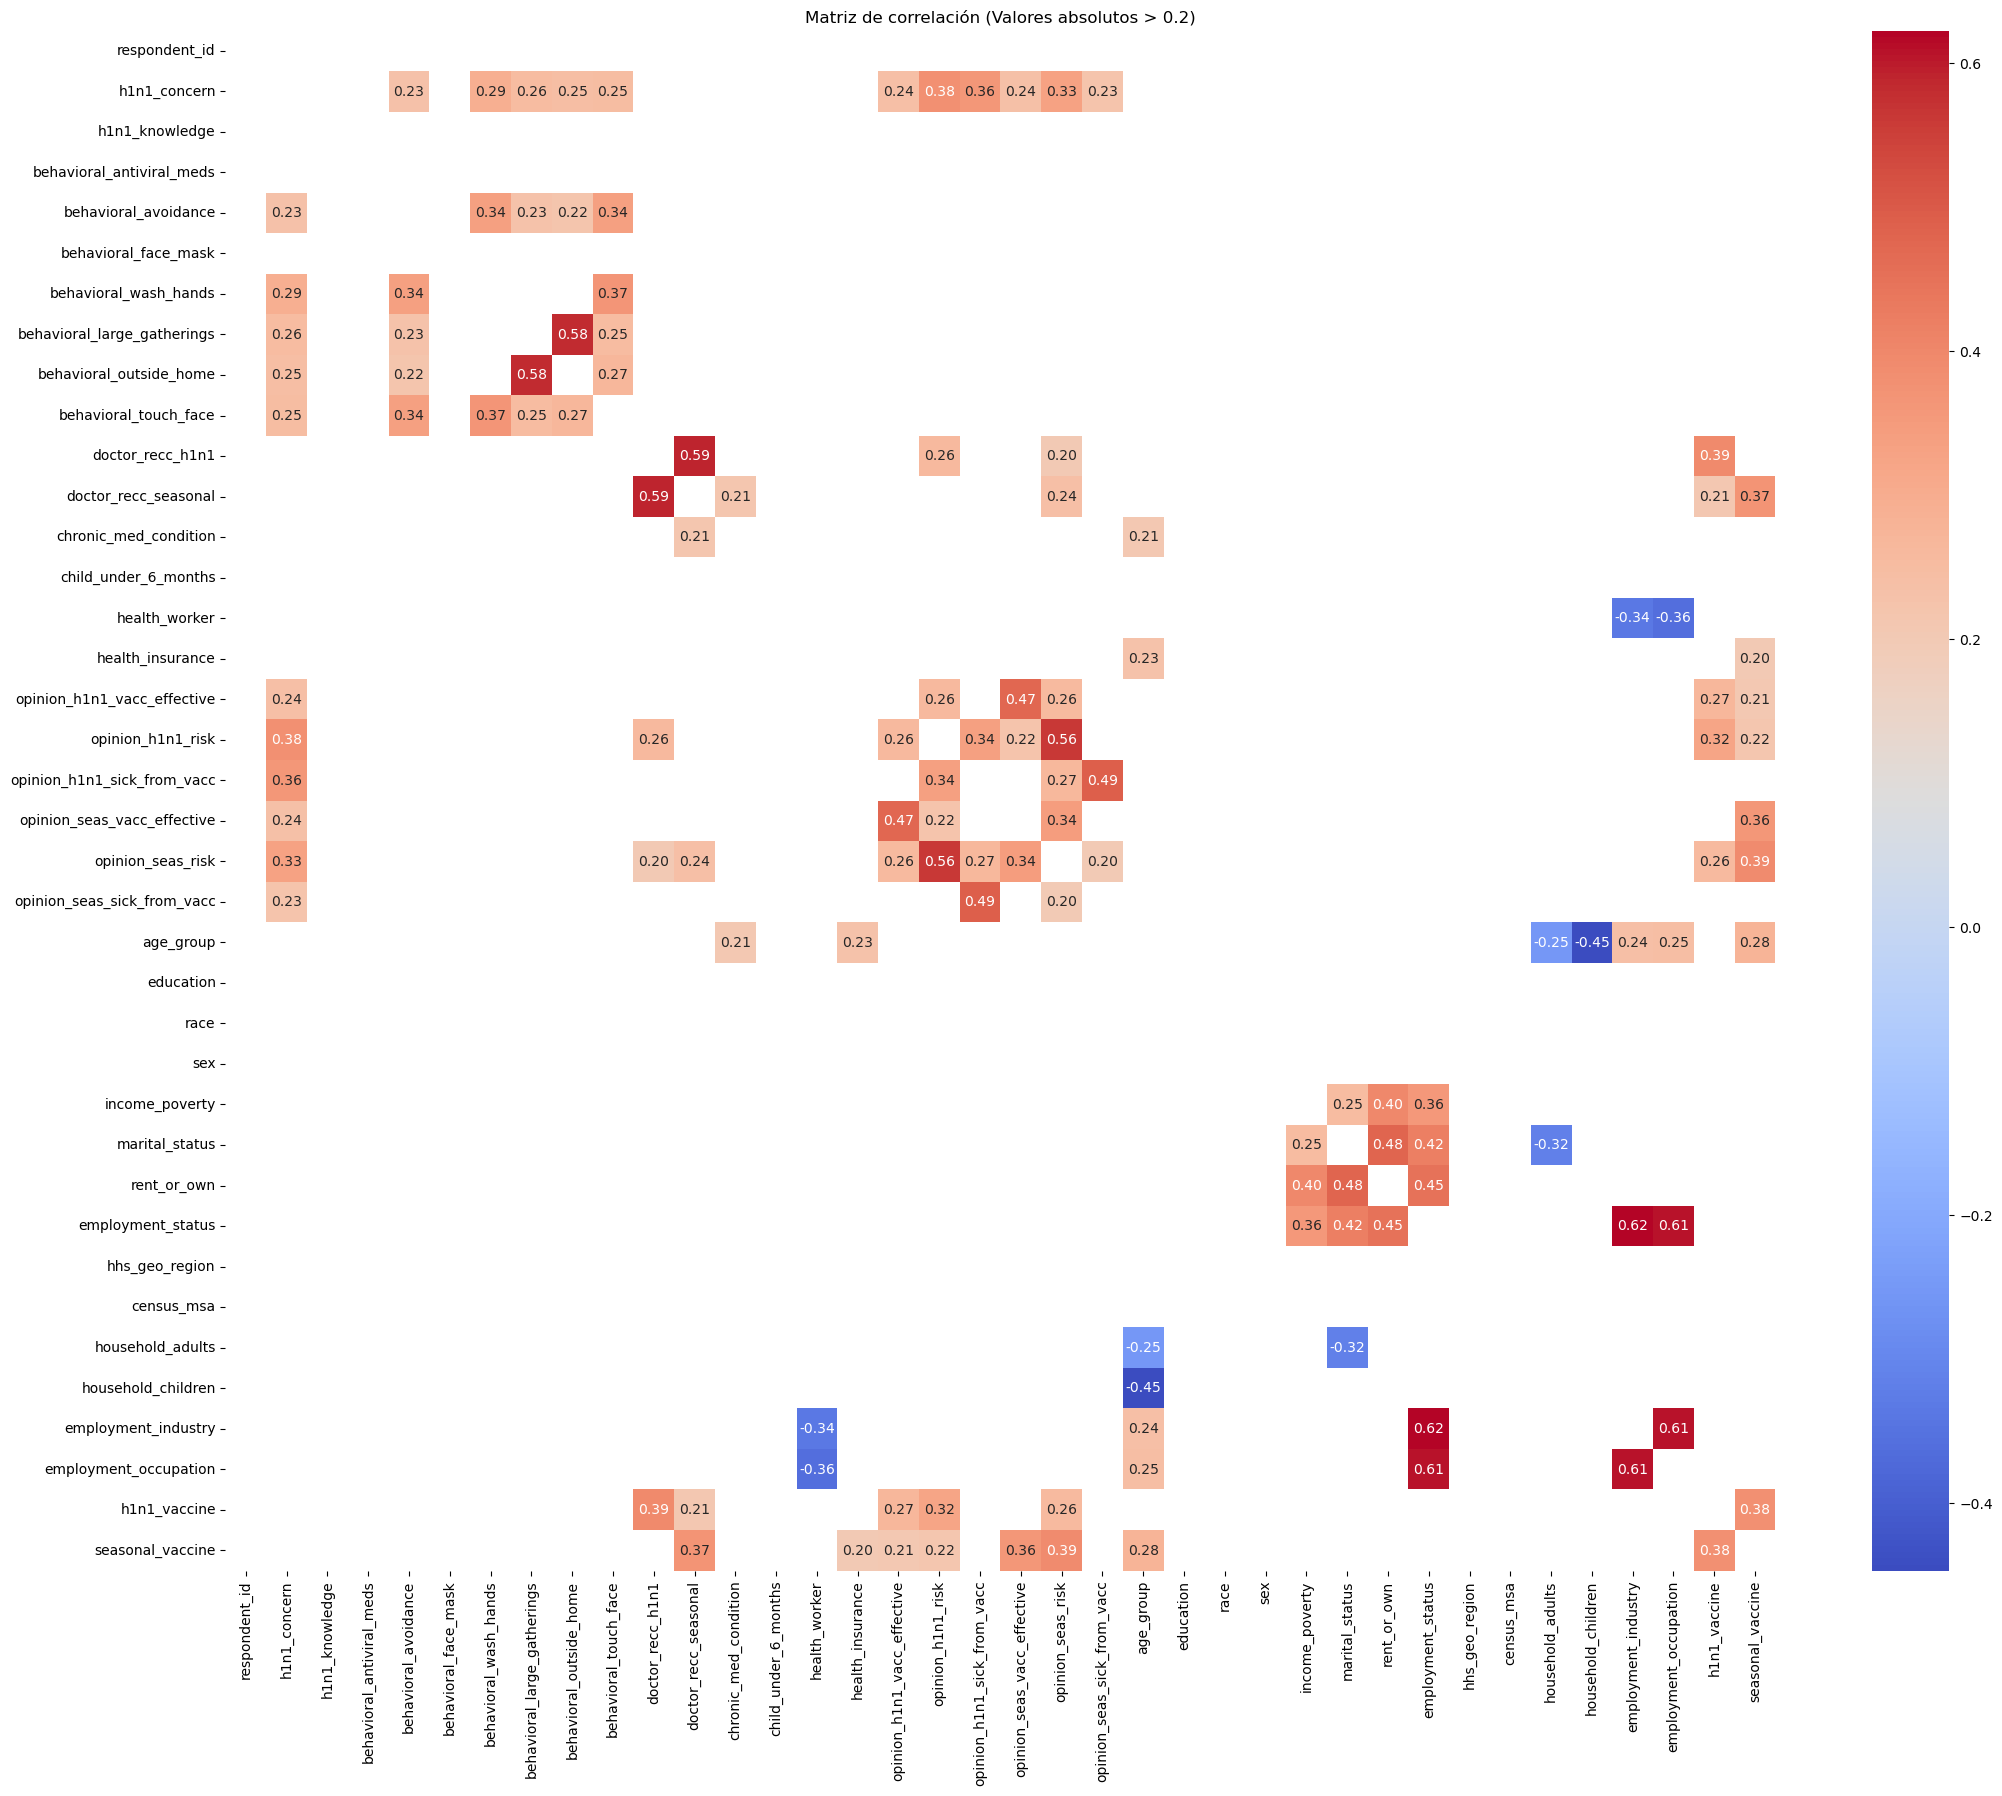

In [35]:
correlation_matrix = merged_df.corr()

limit_filtered_correlation_matrix = 0.20

filtered_corr_matrix = correlation_matrix[(np.abs(correlation_matrix) > limit_filtered_correlation_matrix) & (correlation_matrix != 1.0)]

plt.figure(figsize=(25, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Matriz de correlación (Valores absolutos > {limit_filtered_correlation_matrix})')
plt.show()

# Gráficas de visualización para análisis de datos

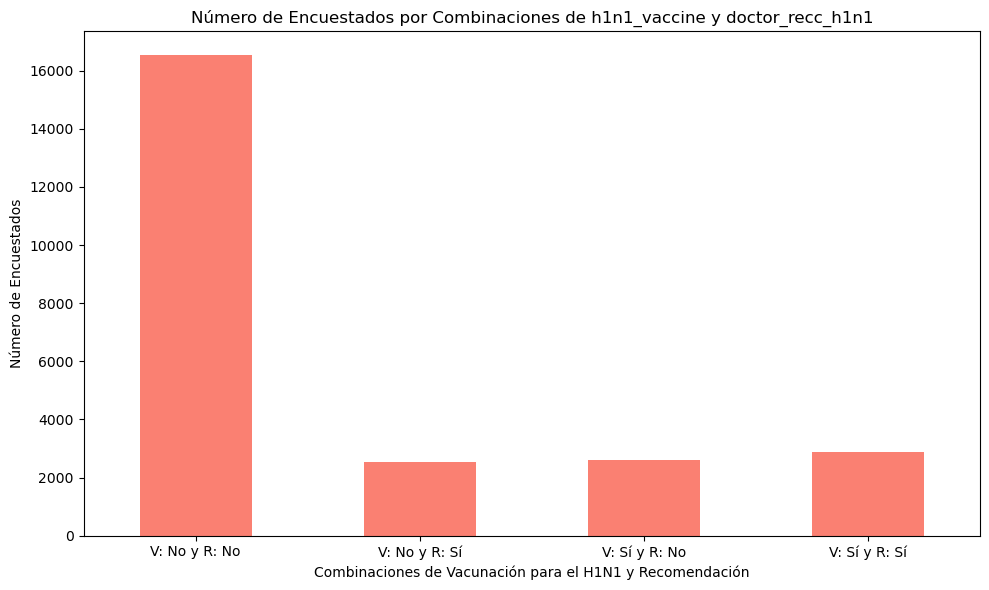

In [36]:
combinations = merged_df.groupby(['h1n1_vaccine', 'doctor_recc_h1n1']).size().reset_index(name='count')

# Crear una columna combinada para usar como etiquetas en el eje x
combinations['combination'] = combinations.apply(
    lambda row: f"V: {'Sí' if row['h1n1_vaccine'] == 1 else 'No'} y R: {'Sí' if row['doctor_recc_h1n1'] == 1 else 'No'}", 
    axis=1
)

# Crear un gráfico de barras con tamaño ajustado
fig, ax = plt.subplots(figsize=(10, 6))
combinations.plot(kind='bar', x='combination', y='count', ax=ax, legend=False, color='salmon')

# Etiquetas y título del gráfico
ax.set_xlabel('Combinaciones de Vacunación para el H1N1 y Recomendación')
ax.set_ylabel('Número de Encuestados')
ax.set_title('Número de Encuestados por Combinaciones de h1n1_vaccine y doctor_recc_h1n1')

# Colocar los labels en diagonal con ajuste de alineación y tamaño de fuente
plt.xticks(rotation=0, ha='center', fontsize=10)

# Ajustar el diseño para que las etiquetas no se corten
plt.tight_layout()

plt.show()

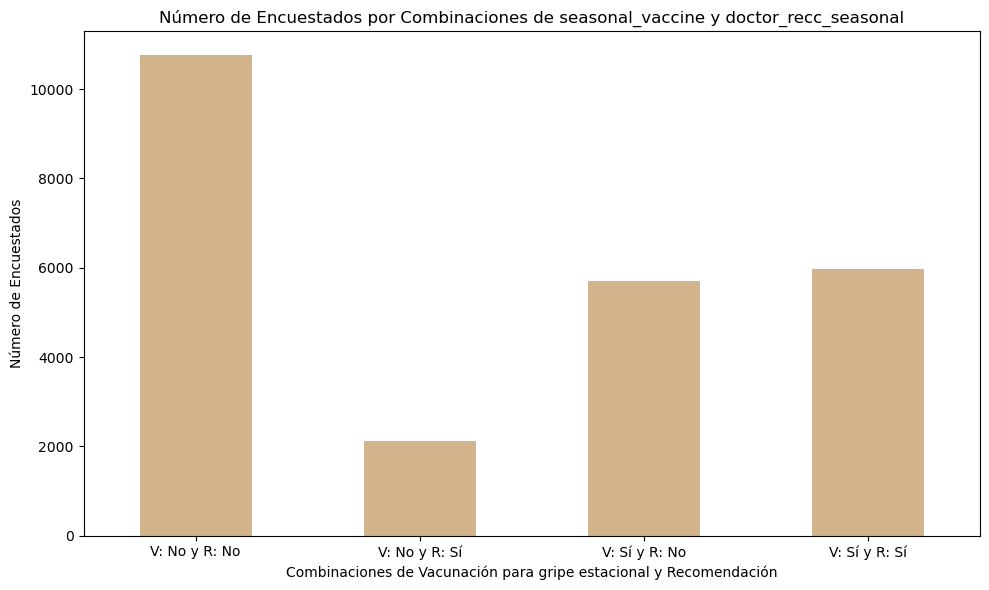

In [37]:
combinations = merged_df.groupby(['seasonal_vaccine', 'doctor_recc_seasonal']).size().reset_index(name='count')

# Crear una columna combinada para usar como etiquetas en el eje x
combinations['combination'] = combinations.apply(
    lambda row: f"V: {'Sí' if row['seasonal_vaccine'] == 1 else 'No'} y R: {'Sí' if row['doctor_recc_seasonal'] == 1 else 'No'}", 
    axis=1
)

# Crear un gráfico de barras con tamaño ajustado
fig, ax = plt.subplots(figsize=(10, 6))
combinations.plot(kind='bar', x='combination', y='count', ax=ax, legend=False, color='tan')

# Etiquetas y título del gráfico
ax.set_xlabel('Combinaciones de Vacunación para gripe estacional y Recomendación')
ax.set_ylabel('Número de Encuestados')
ax.set_title('Número de Encuestados por Combinaciones de seasonal_vaccine y doctor_recc_seasonal')

# Colocar los labels en diagonal con ajuste de alineación y tamaño de fuente
plt.xticks(rotation=0, ha='center', fontsize=10)

# Ajustar el diseño para que las etiquetas no se corten
plt.tight_layout()

plt.show()

# Tratamiento de valores nulos

In [38]:
# Identificar columnas con valores nulos
columnas_con_nulos = merged_df.columns[merged_df.isnull().any()].tolist()

nulos_por_columna = merged_df[columnas_con_nulos].isnull().sum()

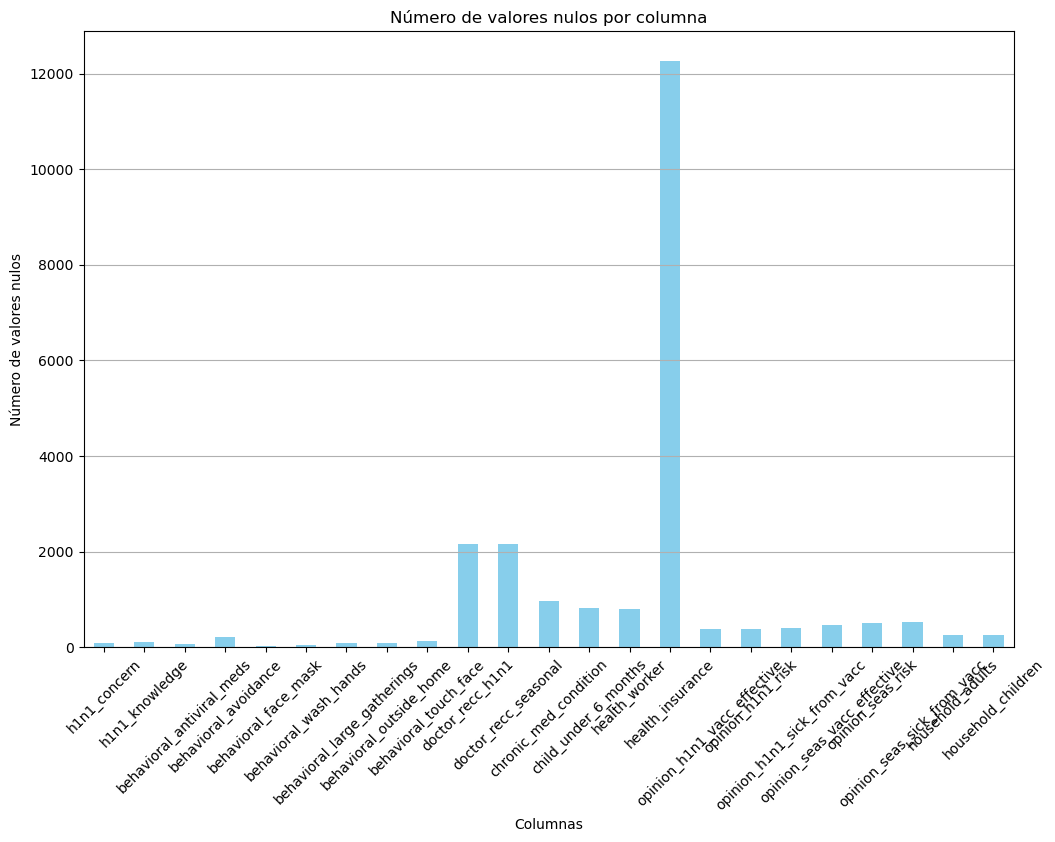

In [39]:
# Crear la gráfica
plt.figure(figsize=(12, 8))
nulos_por_columna.plot(kind='bar', color='skyblue')
plt.title('Número de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

Rellenar las columnas con valores nulos con la moda de cada columna

In [40]:
if use_moda_train:
    moda = test[columna].mode()[0]
    test[columna].fillna(moda, inplace=True)
    print(f'{columna} - {moda}')

Usamos KNNImputer para rellenar los valores nulos

In [41]:
if use_knn_imputer_train:
    imputer = KNNImputer(n_neighbors=num_neighbors_knn)
    imputed_data = imputer.fit_transform(merged_df)
    imputed_data = np.round(imputed_data).astype(int)
    merged_df = pd.DataFrame(imputed_data, columns=merged_df.columns, index=merged_df.index)

Eliminamos los valores nulos

In [42]:
if delete_null_values_train:
    rows_before = len(merged_df)  # Número de filas antes de eliminar valores faltantes

    merged_df = merged_df.dropna()  # Eliminar filas con valores faltantes

    rows_after = len(merged_df)  # Número de filas después de eliminar valores faltantes

    print("Número de filas antes de eliminar valores faltantes:", rows_before)
    print("Número de filas después de eliminar valores faltantes:", rows_after)
    print("Número de filas eliminadas:", rows_before - rows_after)

# Selección de características más importantes

Eliminamos la clase identificador

In [43]:
merged_df = merged_df.drop('respondent_id', axis=1)

In [44]:
X = merged_df.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])

y_h1n1_vaccine = merged_df['h1n1_vaccine']   # Primera columna objetivo (h1n1_vaccine)
y_seasonal_vaccine = merged_df['seasonal_vaccine']   # Segunda columna objetivo (seasonal_vaccine)

Características seleccionadas para h1n1_vaccine: Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_seas_vacc_effective', 'opinion_seas_risk'],
      dtype='object')


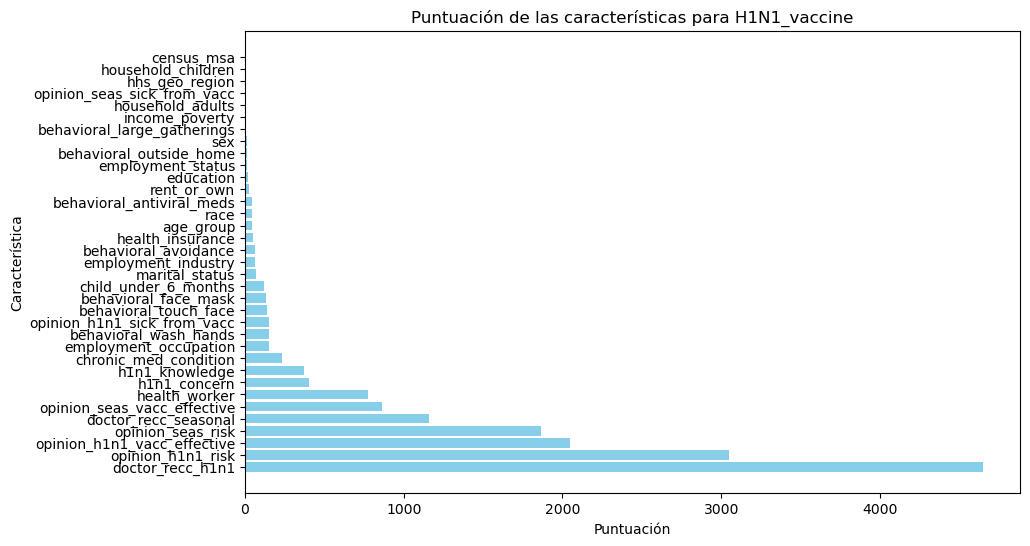

Puntuación de las características para H1N1_vaccine:
                        Feature   Score
9              doctor_recc_h1n1 4649.96
16            opinion_h1n1_risk 3046.21
15  opinion_h1n1_vacc_effective 2046.25
19            opinion_seas_risk 1867.49
10         doctor_recc_seasonal 1158.38
18  opinion_seas_vacc_effective  861.76
13                health_worker  776.15
0                  h1n1_concern  400.05
1                h1n1_knowledge  374.06
11        chronic_med_condition  235.95
34        employment_occupation  151.96
5         behavioral_wash_hands  149.68
17  opinion_h1n1_sick_from_vacc  149.00
8         behavioral_touch_face  135.82
4          behavioral_face_mask  132.70
12         child_under_6_months  118.76
26               marital_status   69.69
33          employment_industry   64.03
3          behavioral_avoidance   59.89
14             health_insurance   52.87
21                    age_group   45.13
23                         race   45.08
2     behavioral_antiviral_

In [45]:
# Crear el selector de características para la primera columna objetivo
selector_h1n1_vaccine = SelectKBest(score_func=f_classif, k=number_of_best_features)  # Aquí especificas el método de selección de características y el número de características que deseas seleccionar

# Aplicar el selector a tus datos para la primera columna objetivo
X_new_h1n1_vaccine = selector_h1n1_vaccine.fit_transform(X, y_h1n1_vaccine)

# Obtener los índices de las características seleccionadas para la primera columna objetivo
selected_features_h1n1_vaccine = selector_h1n1_vaccine.get_support(indices=True)

# Obtener los nombres de las características seleccionadas para la primera columna objetivo
selected_features_names_h1n1_vaccine = X.columns[selected_features_h1n1_vaccine]

# Imprimir los nombres de las características seleccionadas para la primera columna objetivo
print("Características seleccionadas para h1n1_vaccine:", selected_features_names_h1n1_vaccine)

# Obtener los pesos de cada característica para la primera columna objetivo
feature_scores_h1n1_vaccine = selector_h1n1_vaccine.scores_

# Crear un DataFrame con los nombres de las características y sus pesos para la primera columna objetivo
feature_scores_df_h1n1_vaccine = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores_h1n1_vaccine})

# Ordenar el DataFrame por los pesos en orden descendente para la primera columna objetivo
feature_scores_df_h1n1_vaccine = feature_scores_df_h1n1_vaccine.sort_values(by='Score', ascending=False)

# Mostrar la gráfica de barras con los pesos de cada característica para la primera columna objetivo
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df_h1n1_vaccine['Feature'], feature_scores_df_h1n1_vaccine['Score'], color='skyblue')
plt.xlabel('Puntuación')
plt.ylabel('Característica')
plt.title('Puntuación de las características para H1N1_vaccine')
plt.show()

# Imprimir el DataFrame ordenado por los pesos para la primera columna objetivo
print("Puntuación de las características para H1N1_vaccine:")
print(feature_scores_df_h1n1_vaccine)

Características seleccionadas para seasonal_vaccine: Index(['h1n1_concern', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group'],
      dtype='object')


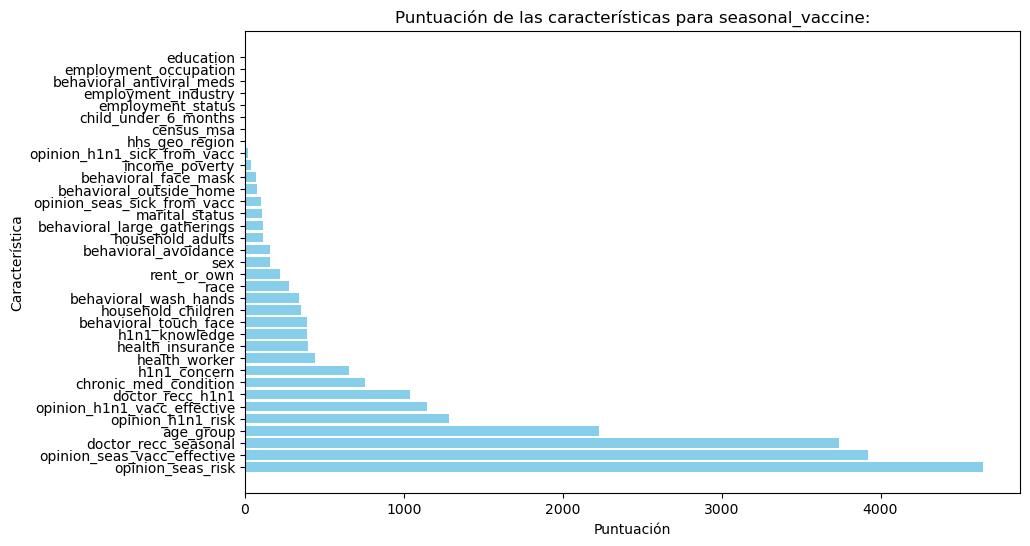

Puntuación de las características para seasonal_vaccine:
                        Feature   Score
19            opinion_seas_risk 4645.79
18  opinion_seas_vacc_effective 3918.43
10         doctor_recc_seasonal 3735.58
21                    age_group 2227.23
16            opinion_h1n1_risk 1286.41
15  opinion_h1n1_vacc_effective 1145.90
9              doctor_recc_h1n1 1040.34
11        chronic_med_condition  753.86
0                  h1n1_concern  651.41
13                health_worker  437.63
14             health_insurance  396.33
1                h1n1_knowledge  388.89
8         behavioral_touch_face  388.35
32           household_children  352.76
5         behavioral_wash_hands  340.60
23                         race  279.31
27                  rent_or_own  222.22
24                          sex  159.65
3          behavioral_avoidance  156.79
31             household_adults  112.39
6   behavioral_large_gatherings  111.62
26               marital_status  104.85
20  opinion_seas_sick_f

In [46]:
# Crear el selector de características para la segunda columna objetivo
selector_seasonal_vaccine = SelectKBest(score_func=f_classif, k=number_of_best_features)  # Aquí especificas el método de selección de características y el número de características que deseas seleccionar

# Aplicar el selector a tus datos para la segunda columna objetivo
X_new_seasonal_vaccine = selector_seasonal_vaccine.fit_transform(X, y_seasonal_vaccine)

# Obtener los índices de las características seleccionadas para la segunda columna objetivo
selected_features_seasonal_vaccine = selector_seasonal_vaccine.get_support(indices=True)

# Obtener los nombres de las características seleccionadas para la segunda columna objetivo
selected_features_names_seasonal_vaccine = X.columns[selected_features_seasonal_vaccine]

# Imprimir los nombres de las características seleccionadas para la segunda columna objetivo
print("Características seleccionadas para seasonal_vaccine:", selected_features_names_seasonal_vaccine)

# Obtener los pesos de cada característica para la segunda columna objetivo
feature_scores_seasonal_vaccine = selector_seasonal_vaccine.scores_

# Crear un DataFrame con los nombres de las características y sus pesos para la segunda columna objetivo
feature_scores_df_seasonal_vaccine = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores_seasonal_vaccine})

# Ordenar el DataFrame por los pesos en orden descendente para la segunda columna objetivo
feature_scores_df_seasonal_vaccine = feature_scores_df_seasonal_vaccine.sort_values(by='Score', ascending=False)

# Mostrar la gráfica de barras con los pesos de cada característica para la segunda columna objetivo
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df_seasonal_vaccine['Feature'], feature_scores_df_seasonal_vaccine['Score'], color='skyblue')
plt.xlabel('Puntuación')
plt.ylabel('Característica')
plt.title('Puntuación de las características para seasonal_vaccine:')
plt.show()

# Imprimir el DataFrame ordenado por los pesos para la segunda columna objetivo
print("Puntuación de las características para seasonal_vaccine:")
print(feature_scores_df_seasonal_vaccine)

# Definimos métodos para el entrenamiento del modelo

In [47]:
def split_x_y(X, y, top_features):
    # Seleccionar las mejores características
    X_mejores_caracteristicas = X[top_features]
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_mejores_caracteristicas, y, test_size=0.2, random_state=42)
    
    if use_smote:
        print("Aplicando SMOTE...")
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        
    if use_adasyn:
        print("Aplicando ADASYN...")
        adasyn = ADASYN(random_state=42)
        X_train, y_train = adasyn.fit_resample(X_train, y_train)
    
    if use_nearmiss:
        print("Aplicando NearMiss...")
        nm = NearMiss(version=2)
        X_train, y_train = nm.fit_resample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test

In [48]:
def apply_scaler(X):
    
    scaler = None
    
    if use_minmax_scaler:
        print("Aplicando MinMaxScaler...")
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(X)

        X = pd.DataFrame(scaled_data, columns=X.columns)
        
    if use_standard_scaler:
        print("Aplicando StandardScaler...")
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(X)

        X = pd.DataFrame(scaled_data, columns=X.columns)
        
    return X, scaler

In [49]:
def entrenar_y_evaluar(modelo, search_cv, X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    search_cv.fit(X_train, y_train)
    
    print('¡Entrenamiento finalizado!')

    # Obtener el mejor modelo entrenado
    mejor_modelo = search_cv.best_estimator_

    # Realizar predicciones
    probabilities = mejor_modelo.predict_proba(X_test)[:, 1]
    predictions = mejor_modelo.predict(X_test)

    accuracy_result = accuracy_score(y_test, mejor_modelo.predict(X_test))
    auc_result = roc_auc_score(y_test, probabilities, average='macro')

    print("Accuracy:", accuracy_result)
    print("AUC:", auc_result)
    
    print(f'Mejores parámetros encontrados: {search_cv.best_params_}')
    print("---------------------------------------------------------------------------")
    
    # Graficar la curva ROC
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f' Curva ROC - {modelo.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

    # Graficar la matriz de confusión
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de confusión - {modelo.__class__.__name__}')
    plt.show()
    
    return mejor_modelo

In [50]:
def entrenar_y_evaluar_modelo_con_search(modelo, parametros, X, y, top_features, search_type):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = split_x_y(X, y, top_features)

    # Crear el objeto de búsqueda
    if search_type == 'grid':
        print(f"Empezando búsqueda de hiperpárametros para {modelo.__class__.__name__} con GridSearchCV")
        search_cv = GridSearchCV(estimator=modelo, param_grid=parametros, scoring='roc_auc', cv=5, n_jobs=-1)
    elif search_type == 'random':
        print(f"Empezando búsqueda de hiperpárametros para {modelo.__class__.__name__} con RandomSearchCV")
        search_cv = RandomizedSearchCV(estimator=modelo, param_distributions=parametros, scoring='roc_auc', cv=5, n_jobs=-1, n_iter=100)
    else:
        raise ValueError("search_type debe ser 'grid' o 'random'")
    
    return entrenar_y_evaluar(modelo, search_cv, X_train, X_test, y_train, y_test)

# Evaluamos con LazyPredict

In [51]:
X, scaler = apply_scaler(X)

In [52]:
def evaluate_lazy_classifier(X, y, top_features, target):
    print(f"Evaluando modelos con LazyClassifier para {target}...")
    
    lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    
    X_train, X_test, y_train, y_test = split_x_y(X, y, top_features)
    
    models, predictions = lazy_classifier.fit(X_train, X_test, y_train, y_test)
    
    return models

In [53]:
use_lazy_predict = True

In [54]:
if use_lazy_predict:
    predictions_h1n1_vaccine_lazypredict = evaluate_lazy_classifier(X, y_h1n1_vaccine, selected_features_names_h1n1_vaccine, 'h1n1_vaccine')

    predictions_h1n1_vaccine_lazypredict

Evaluando modelos con LazyClassifier para h1n1_vaccine...


 97%|█████████▋| 28/29 [01:32<00:04,  4.46s/it]

[LightGBM] [Info] Number of positive: 4544, number of negative: 16821
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212684 -> initscore=-1.308820
[LightGBM] [Info] Start training from score -1.308820


100%|██████████| 29/29 [01:33<00:00,  3.22s/it]


In [55]:
if use_lazy_predict:
    predictions_seasonal_vaccine_lazypredict = evaluate_lazy_classifier(X, y_seasonal_vaccine, selected_features_names_seasonal_vaccine, 'seasonal_vaccine')

    predictions_seasonal_vaccine_lazypredict

Evaluando modelos con LazyClassifier para seasonal_vaccine...


 97%|█████████▋| 28/29 [02:19<00:05,  5.60s/it]

[LightGBM] [Info] Number of positive: 9984, number of negative: 11381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467306 -> initscore=-0.130961
[LightGBM] [Info] Start training from score -0.130961


100%|██████████| 29/29 [02:19<00:00,  4.83s/it]


# Entrenamiento de modelo

In [56]:
model_h1n1_vaccine = None
model_seasonal_vaccine = None

## LogisticRegression

In [57]:
param_logistic_regression = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_iter': [100, 500, 1000, 2000],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'fit_intercept': [True, False],
}

### h1n1_vaccine

In [58]:

if use_grid_search and use_logistic_regression_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con GridSearchCV y el modelo LogisticRegression...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        LogisticRegression(),
        param_logistic_regression,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'grid'
    )

In [59]:
if use_random_search and use_logistic_regression_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con RandomSearchCV y el modelo LogisticRegression...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        LogisticRegression(),
        param_logistic_regression,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'random'
    )

### seasonal_vaccine

In [60]:
if use_grid_search and use_logistic_regression_seasonal_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con GridSearchCV y el modelo LogisticRegression...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        LogisticRegression(),
        param_logistic_regression,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'grid'
    )

In [61]:
if use_random_search and use_logistic_regression_seasonal_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con RandomSearchCV y el modelo LogisticRegression...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        LogisticRegression(),
        param_logistic_regression,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'random'
    )

## RandomForestClassifier

In [62]:
param_rf_classifier = {"n_estimators": [10, 50, 100],
              "max_depth": [3, 5, 10, None],
              "max_features": [1, 3, 5, 10],
              "min_samples_split": [2, 5, 10],
              "bootstrap": [True, False]}

### h1n1_vaccine

In [63]:
if use_grid_search and use_random_forest_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con GridSearchCV y el modelo RandomForestClassifier...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        RandomForestClassifier(random_state=42),
        param_rf_classifier,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'grid'
    )

Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con RandomSearchCV y el modelo RandomForestClassifier...
Empezando búsqueda de hiperpárametros para RandomForestClassifier con RandomSearchCV
¡Entrenamiento finalizado!
Accuracy: 0.8352676900037439
AUC: 0.8295932817319248
Mejores parámetros encontrados: {'n_estimators': 50, 'min_samples_split': 10, 'max_features': 3, 'max_depth': 10, 'bootstrap': True}
---------------------------------------------------------------------------


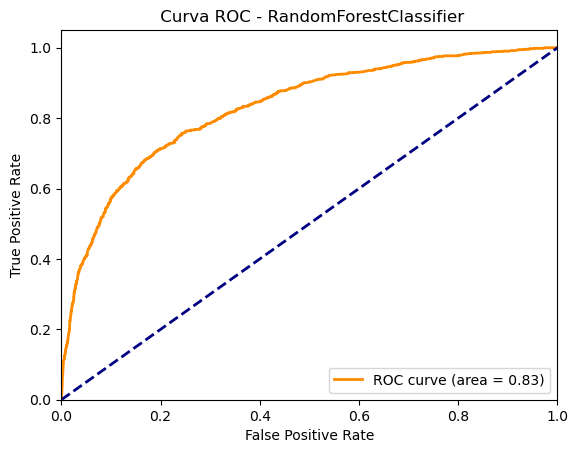

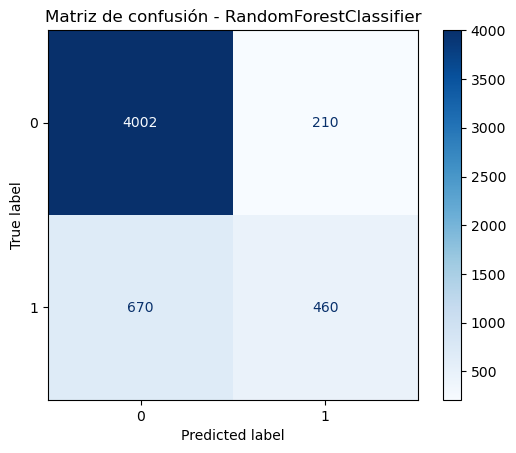

In [64]:
if use_random_search and use_random_forest_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con RandomSearchCV y el modelo RandomForestClassifier...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        RandomForestClassifier(random_state=42),
        param_rf_classifier,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'random'
    )

### seasonal_vaccine

In [65]:
if use_grid_search and use_random_forest_seasonal_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con GridSearchCV y el modelo RandomForestClassifier...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        RandomForestClassifier(random_state=42),
        param_rf_classifier,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'grid'
    )

Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con RandomSearchCV y el modelo RandomForestClassifier...
Empezando búsqueda de hiperpárametros para RandomForestClassifier con RandomSearchCV
¡Entrenamiento finalizado!
Accuracy: 0.7690003743916136
AUC: 0.8434557027175743
Mejores parámetros encontrados: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 3, 'max_depth': 10, 'bootstrap': True}
---------------------------------------------------------------------------


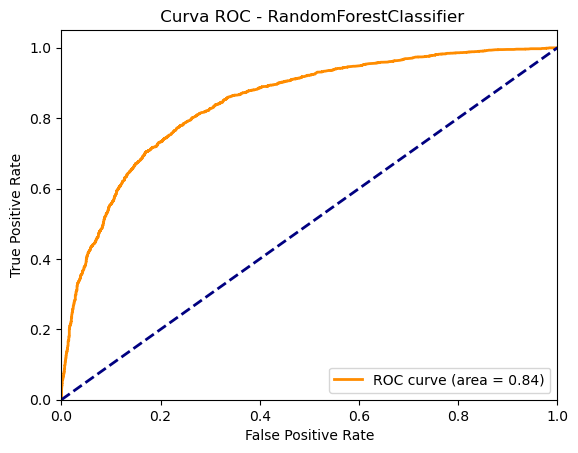

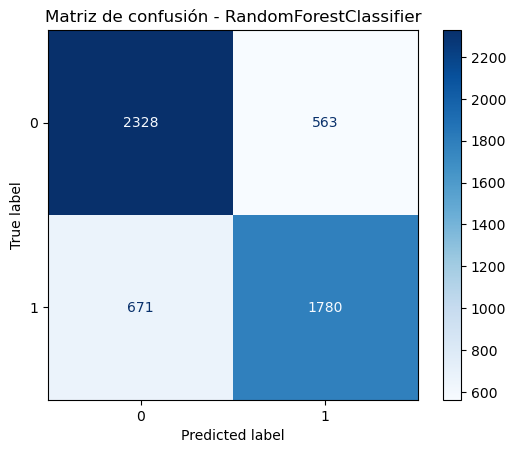

In [66]:
if use_random_search and use_random_forest_seasonal_vaccine:    
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con RandomSearchCV y el modelo RandomForestClassifier...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        RandomForestClassifier(random_state=42),
        param_rf_classifier,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'random'
    )

## AdaBoostClassifier

In [67]:
param_adaboost_classifier = {
    'n_estimators': [50, 100, 200, 500], 
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],  
    'algorithm': ['SAMME', 'SAMME.R'],  
    'random_state': [None, 0, 42, 100],  
    'estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)],  
}

### h1n1_vaccine

In [68]:
if use_grid_search and use_ada_boost_classifier_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con GridSearchCV y el modelo AdaBoostClassifier...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        AdaBoostClassifier(),
        param_adaboost_classifier,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'grid'
    )

In [69]:
if use_random_search and use_ada_boost_classifier_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con RandomSearchCV y el modelo AdaBoostClassifier...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        AdaBoostClassifier(),
        param_adaboost_classifier,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'random'
    )

### seasonal_vaccine

In [70]:
if use_grid_search and use_ada_boost_classifier_seasonal_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con GridSearchCV y el modelo AdaBoostClassifier...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        AdaBoostClassifier(),
        param_adaboost_classifier,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'grid'
    )

In [71]:
if use_random_search and use_ada_boost_classifier_seasonal_vaccine: 
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con RandomSearchCV y el modelo AdaBoostClassifier...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        AdaBoostClassifier(),
        param_adaboost_classifier,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'random'
    )

## XGBClassifier

In [72]:
param_xgb_classifier = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

### h1n1_vaccine

In [73]:
if use_grid_search and use_xgb_classifier_h1n1_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con GridSearchCV y el modelo XGBClassifier...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        XGBClassifier(),
        param_xgb_classifier,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'grid'
    )

In [74]:
if use_random_search and use_xgb_classifier_h1n1_vaccine:    
    print("Vamos a realizar búsqueda de hiperparámetros para h1n1_vaccine con RandomSearchCV y el modelo XGBClassifier...")
    model_h1n1_vaccine = entrenar_y_evaluar_modelo_con_search(
        XGBClassifier(),
        param_xgb_classifier,
        X,
        y_h1n1_vaccine,
        selected_features_names_h1n1_vaccine,
        'random'
    )

### seasonal_vaccine

In [75]:
if use_grid_search and use_xgb_classifier_seasonal_vaccine:
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con GridSearchCV y el modelo XGBClassifier...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        XGBClassifier(),
        param_xgb_classifier,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'grid'
    )

In [76]:
if use_random_search and use_xgb_classifier_seasonal_vaccine:      
    print("Vamos a realizar búsqueda de hiperparámetros para seasonal_vaccine con RandomSearchCV y el modelo XGBClassifier...")
    model_seasonal_vaccine = entrenar_y_evaluar_modelo_con_search(
        XGBClassifier(),
        param_xgb_classifier,
        X,
        y_seasonal_vaccine,
        selected_features_names_seasonal_vaccine,
        'random'
    )

## Red neuronal

In [77]:
def entrenar_red_neuronal(X, y, top_features):
    X_train, X_test, y_train, y_test = split_x_y(X, y, top_features)

    model = Sequential([
        Dense(256, activation='relu', input_shape=(10,), kernel_regularizer=l2(0.01)),  # Capa densa con regularización L2
        BatchNormalization(),  # Normalización de lotes
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Capa densa con regularización L2
        BatchNormalization(),  # Normalización de lotes
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),   # Capa densa con regularización L2
        Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona y función de activación sigmoide para clasificación binaria
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=epochs_red_neuronal, batch_size=32, validation_split=0.2)

    probabilidades = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, probabilidades, average='macro')

    print("Área bajo la curva ROC (AUC):", roc_auc)
    
    return model

### h1n1_vaccine

In [78]:
if use_red_neuronal_h1n1_vaccine:
    model_h1n1_vaccine = entrenar_red_neuronal(X, y_h1n1_vaccine, selected_features_names_h1n1_vaccine)

### seasonal_vaccine

In [79]:
if use_red_neuronal_seasonal_vaccine:
    model_seasonal_vaccine = entrenar_red_neuronal(X, y_seasonal_vaccine, selected_features_names_seasonal_vaccine)

# Realizamos la predicción con el dataset de test

Codificamos las columnas con el mismo encoder que se ha hecho en el dataset de entrenamiento

In [80]:
for col, le in encoders.items():
    if col in test.columns:
        test[col] = le.transform(test[col])

Identificar columnas con valores nulos

In [81]:
columnas_con_nulos = test.columns[test.isnull().any()].tolist()

Rellenar las columnas con valores nulos con la moda de cada columna

In [82]:
if use_moda_test:
    moda = test[columna].mode()[0]
    test[columna].fillna(moda, inplace=True)
    print(f'{columna} - {moda}')

Rellenamos los valores nulos con KNNImputer

In [83]:
if use_knn_imputer_test:
    imputer_test = KNNImputer(n_neighbors=5)
    imputed_data_test = imputer.fit_transform(test)
    imputed_data_test = np.round(imputed_data_test).astype(int)
    test = pd.DataFrame(imputed_data_test, columns=test.columns, index=test.index)

Realizamos una copia de los datos de test para mantener los id de los encuestados

In [84]:
test_copy = test.copy()

test = test.drop('respondent_id', axis=1)

Escalamos los datos con el mismo scaler que se ha utilizado en los datos de entrenamiento

In [85]:
if not not_use_scaler:
    test_scaled = scaler.transform(test)

    test_df = pd.DataFrame(test_scaled, columns=test.columns)

test_df = test

Realizamos la predicción para h1n1_vaccine

In [86]:
test_selected_features_names_h1n1_vaccine = test_df[selected_features_names_h1n1_vaccine]

if use_red_neuronal_h1n1_vaccine:
    probabilities_test_h1n1_vaccine = model_h1n1_vaccine.predict(test_selected_features_names_h1n1_vaccine).flatten()
else: 
    probabilities_test_h1n1_vaccine = model_h1n1_vaccine.predict_proba(test_selected_features_names_h1n1_vaccine)[:, 1]

probabilities_test_h1n1_vaccine_truncated = [round(prob, 1) for prob in probabilities_test_h1n1_vaccine]

print("Probabilidades predichas para 'h1n1_vaccine' en el conjunto de prueba:")
print(probabilities_test_h1n1_vaccine_truncated)

Probabilidades predichas para 'h1n1_vaccine' en el conjunto de prueba:
[0.1, 0.0, 0.4, 0.5, 0.4, 0.6, 0.3, 0.1, 0.0, 0.1, 0.0, 0.2, 0.2, 0.1, 0.7, 0.0, 0.6, 0.1, 0.0, 0.0, 0.2, 0.2, 0.1, 0.1, 0.0, 0.1, 0.9, 0.8, 0.1, 0.1, 0.0, 0.5, 0.1, 0.1, 0.2, 0.1, 0.0, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.5, 0.4, 0.0, 0.2, 0.1, 0.0, 0.0, 0.6, 0.4, 0.0, 0.0, 0.4, 0.2, 0.8, 0.9, 0.1, 0.2, 0.7, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.1, 0.1, 0.5, 0.1, 0.2, 0.1, 0.3, 0.2, 0.1, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1, 0.0, 0.1, 0.0, 0.2, 0.1, 0.7, 0.0, 0.0, 0.1, 0.3, 0.3, 0.1, 0.2, 0.0, 0.1, 0.0, 0.1, 0.1, 0.5, 0.2, 0.6, 0.1, 0.1, 0.1, 0.2, 0.0, 0.0, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.0, 0.3, 0.1, 0.1, 0.2, 0.5, 0.3, 0.3, 0.2, 0.0, 0.4, 0.4, 0.2, 0.1, 0.1, 0.2, 0.1, 0.4, 0.0, 0.0, 0.1, 0.1, 0.0, 0.4, 0.1, 0.3, 0.6, 0.0, 0.0, 0.4, 0.0, 0.5, 0.1, 0.6, 0.2, 0.1, 0.2, 0.0, 0.1, 0.2, 0.4, 0.0, 0.2, 0.1, 0.9, 0.1, 0.5, 0.1, 0.2, 0.3, 0.1, 0.5, 0.1, 0.1, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.3, 0.1, 0.5, 0.9, 0.1, 0.2, 0.5, 0.2

Realizamos la predicción para seasonal_vaccine

In [87]:
test_selected_features_names_seasonal_vaccine = test_df[selected_features_names_seasonal_vaccine]

if use_red_neuronal_h1n1_vaccine:
    probabilities_test_seasonal_vaccine = model_seasonal_vaccine.predict(test_selected_features_names_seasonal_vaccine).flatten()
else:
    probabilities_test_seasonal_vaccine = model_seasonal_vaccine.predict_proba(test_selected_features_names_seasonal_vaccine)[:, 1] 
    
probabilities_test_seasonal_vaccine_truncated = [round(prob, 1) for prob in probabilities_test_seasonal_vaccine]

print("Probabilidades predichas para 'seasonal_vaccine' en el conjunto de prueba:")
print(probabilities_test_seasonal_vaccine_truncated)

Probabilidades predichas para 'seasonal_vaccine' en el conjunto de prueba:
[0.2, 0.1, 0.8, 0.9, 0.5, 0.8, 0.4, 0.1, 0.1, 0.8, 0.5, 0.3, 0.9, 0.3, 0.8, 0.1, 0.9, 0.7, 0.1, 0.1, 0.8, 0.4, 0.2, 0.2, 0.2, 0.1, 1.0, 0.5, 0.5, 0.2, 0.1, 0.8, 0.2, 0.1, 0.9, 0.2, 0.3, 0.6, 0.9, 0.3, 0.2, 0.1, 0.5, 0.8, 0.8, 0.1, 0.5, 0.4, 0.4, 0.0, 0.7, 0.8, 0.1, 0.1, 0.8, 0.8, 1.0, 1.0, 0.5, 0.2, 0.6, 0.5, 0.2, 0.7, 0.3, 0.3, 0.5, 0.4, 0.5, 0.5, 0.8, 0.4, 0.5, 0.9, 0.3, 0.2, 0.2, 0.9, 0.4, 0.2, 0.6, 0.9, 0.1, 0.2, 0.1, 0.6, 0.9, 0.8, 0.8, 0.0, 0.5, 0.2, 0.3, 0.9, 0.3, 0.2, 0.2, 0.1, 0.3, 0.9, 0.9, 0.4, 0.4, 0.2, 0.1, 0.8, 0.4, 0.6, 0.1, 0.3, 0.6, 0.2, 0.3, 0.2, 0.5, 0.8, 0.5, 0.6, 0.7, 0.6, 0.3, 0.8, 0.8, 0.9, 0.8, 0.7, 0.6, 0.6, 0.9, 0.8, 0.1, 0.4, 0.3, 0.2, 0.6, 0.2, 0.0, 0.5, 0.8, 0.9, 0.1, 0.8, 0.4, 0.6, 0.1, 0.1, 0.3, 0.1, 0.8, 0.1, 0.1, 0.5, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.0, 0.5, 0.1, 0.9, 0.5, 0.9, 0.1, 0.5, 0.7, 0.2, 0.9, 0.1, 0.2, 0.5, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.8, 0.7, 0.8, 1.0, 0.1, 0.3, 0.6,

Mezclamos la columna del encuestado con las probabilidades predichas de h1n1_vaccine y seasonal_vaccine en un mismo DataFrame

In [88]:
respondent_ids = test_copy['respondent_id']

submission_df = pd.DataFrame({
    'respondent_id': respondent_ids,
    'h1n1_vaccine': probabilities_test_h1n1_vaccine,  # Probabilidades predichas para la primera variable objetivo (h1n1_vaccine)
    'seasonal_vaccine': probabilities_test_seasonal_vaccine  # Probabilidades predichas para la segunda variable objetivo (seasonal_vaccine)
})

Generamos el archivo CSV para entregar en la competición añadiendo una marca de tiempo para identificarlos fácilmente

In [89]:
now = datetime.now()
date = now.strftime("%Y-%m-%d")
time = now.strftime("%H-%M")

nombre_archivo = f'submissions/{date}/{time}/submission_{time}.csv'

os.makedirs(os.path.dirname(nombre_archivo), exist_ok=True)

submission_df.to_csv(nombre_archivo, index=False)

# Guardamos los modelos entrenados

In [90]:
location_h1n1_vaccine = f'submissions/{date}/{time}/h1n1_vaccine_model.pkl'

location_seasonal_vaccine = f'submissions/{date}/{time}/seasonal_vaccine_model.pkl'

In [91]:
with open(location_h1n1_vaccine, 'wb') as f:
    pickle.dump(model_h1n1_vaccine, f)
    
with open(location_seasonal_vaccine, 'wb') as f:
    pickle.dump(model_seasonal_vaccine, f)

# Tiempo total de ejecución

In [92]:
end_time = datetime.now()
execution_time = end_time - start_time
print(f"Tiempo total de ejecución: {execution_time}")

Tiempo total de ejecución: 0:09:20.874853
